## Atmospheric effects on Ground Based Telescope Observing Bands
This notebook uses a python script to calculate and plot CMB instrument sensitivity to fluctuations in atmospheric pwv, given band shapes.

In [1]:
##### import matplotlib.pyplot as plt
#edit
import numpy as np
import matplotlib.scale as scale
import matplotlib.pyplot as plt
import yaml
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

from Atmos_pwv_funcs import *

%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [8, 6]

# am model files for Atacama and Pole
Instead of using CH's datacube with information on tb, tx, and frequency, we can upload our own output txt files directly from the am model.  This way we can refine the number of frequency steps, elevation, and look at Jacobian values for pwv in sites. Where the deg is in AZ not EL

input: am ACT_annual_50.amc 0 GHz 600 GHz 0.1 GHz 40 deg 0.0 >> ACT_annual50_0pwv.txt

output: f GHz  tau neper  tx none  Trj K  Tb K

- SPole- 425.426 um pwv at 50% --> tropscale= 0.705 for 300 um, 0.941 for 400 um
- Atacama- 931.525 um pwv at 50% --> tropscale= 0.966 for 900 um, 1.07 for 1000 um
- Also note: divide SP Tb values by 0.425 to get the correct number due to scaling- divide ACT values by 0.932

## Incorporating the Jacobian to replace $\delta T_b/ \delta pwv$

In the .py file, specify if you would like to run with or without Jacobian of T_rj for the atmospheric profile (ie. atmos=?). The results will look different and thus you will need to adjust the code below.

If running with Jacobian:
- atmos[site][pwv][4]= delta_tb/delta_pwv
- atmos[site][pwv][5]= Tb (only)
- & you need to scale accordingly

If running without the Jacobian:
- atmos[site][pwv][4]= Tb 
- therefore you have to calculate the delta_tb/delta_pwv by hand

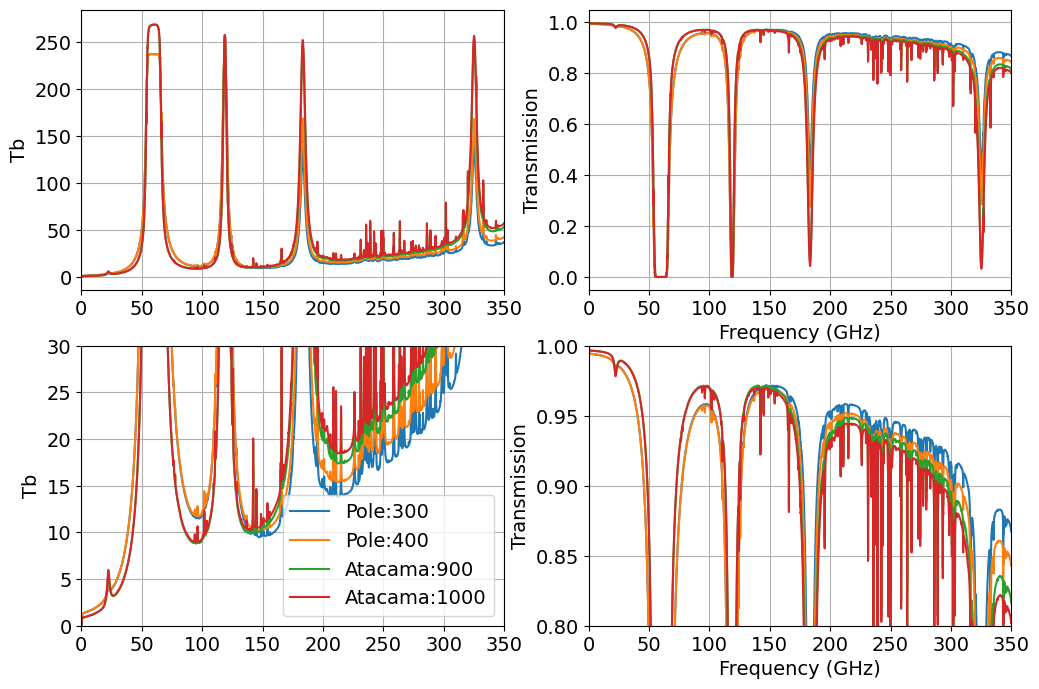

In [2]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 8]

# Read in atmospheric data, plot it to see that it makes sense.
atmos = {}
read_atmospheres(atmos)

numax = 350
plt.subplot(2,2,1)
for site in ['Pole','Atacama']:
    for pwv in atmos[site].keys():
        plt.plot(atmos[site][pwv][0],atmos[site][pwv][5])
plt.ylabel('Tb') 
plt.xlim(0,numax)
plt.grid()

plt.subplot(2,2,2)
for site in ['Pole','Atacama']:
    for pwv in atmos[site].keys():
        plt.plot(atmos[site][pwv][0],atmos[site][pwv][2])
plt.ylabel('Transmission')
plt.xlabel('Frequency (GHz)')
plt.xlim(0,numax)
plt.grid()

plt.subplot(2,2,3)
for site in ['Pole','Atacama']:
    for pwv in atmos[site].keys():
        pltlabel=site+':'+str(pwv)
        #x=
        plt.plot(atmos[site][pwv][0],atmos[site][pwv][5],label=pltlabel)
plt.legend()
plt.ylabel('Tb') #or '$\delta Tb/ \delta pwv$
plt.xlim(0,numax)
plt.ylim(0,30)
plt.grid()

plt.subplot(2,2,4)
for site in ['Pole','Atacama']:
    for pwv in atmos[site].keys():
        plt.plot(atmos[site][pwv][0],atmos[site][pwv][2])
plt.ylabel('Transmission')
plt.xlabel('Frequency (GHz)')
plt.xlim(0,numax)
plt.ylim(0.8,1.0)
plt.grid()



Text(0.5, 1.0, 'Atmospheric Transmission: South Pole and Atacama Desert')

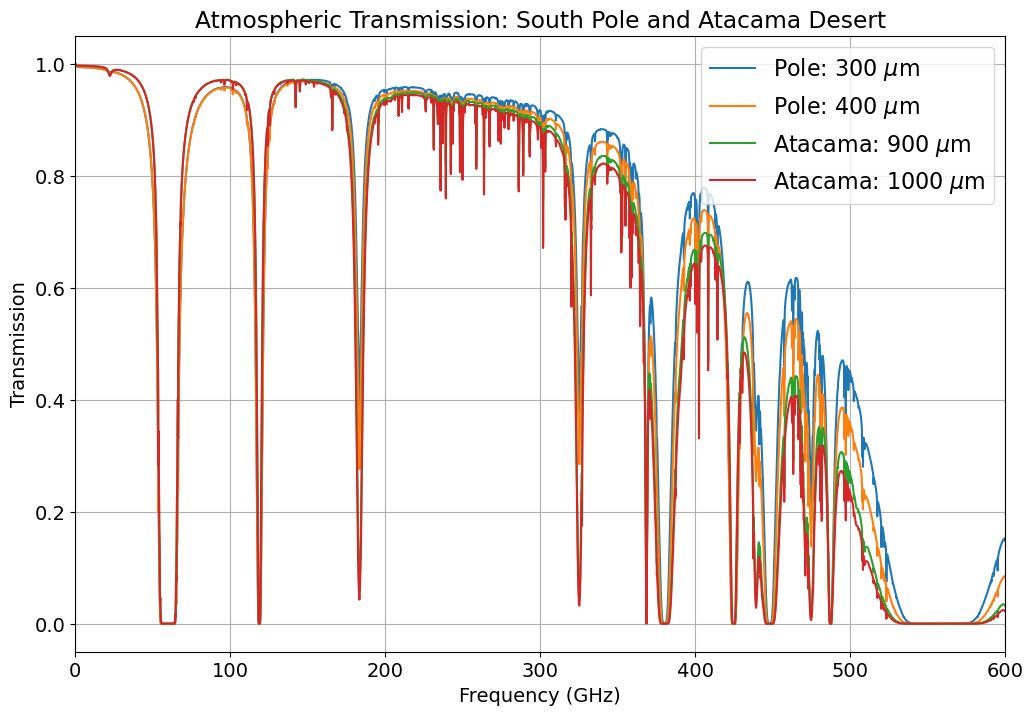

In [3]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 8]
for site in ['Pole','Atacama']:
    for pwv in atmos[site].keys():
        pltlabel=site+': '+str(pwv)+ ' $\mu$m'
        plt.plot(atmos[site][pwv][0],atmos[site][pwv][2], label=pltlabel)
plt.ylabel('Transmission')#('$T_B$ (K)')
plt.xlabel('Frequency (GHz)')
plt.xlim(0,600)
plt.grid()
plt.legend(fontsize="16", loc='upper right')
plt.title('Atmospheric Transmission: South Pole and Atacama Desert')

In [4]:
#Spectrum only plot
#plt.rcParams.update({'font.size': 14})
#plt.rcParams['figure.figsize'] = [12, 8]

#for site in ['Pole','Atacama']:
 #   for pwv in atmos[site].keys():
  #      pltlabel=site+':'+str(pwv)+' um'
   #     plt.plot(atmos[site][pwv][0],atmos[site][pwv][5], label=pltlabel)
#plt.ylabel('Tb')
#plt.xlabel('Frequency (GHz)')
#plt.xlim(0,600)
#plt.grid()
#plt.legend()
#plt.title('Planck Brightness Temperature vs Frequency')

## Plot delta_Tb / delta_pwv (Original Way)


Text(0.5, 1.0, '$\\delta T_B/ \\delta pwv$')

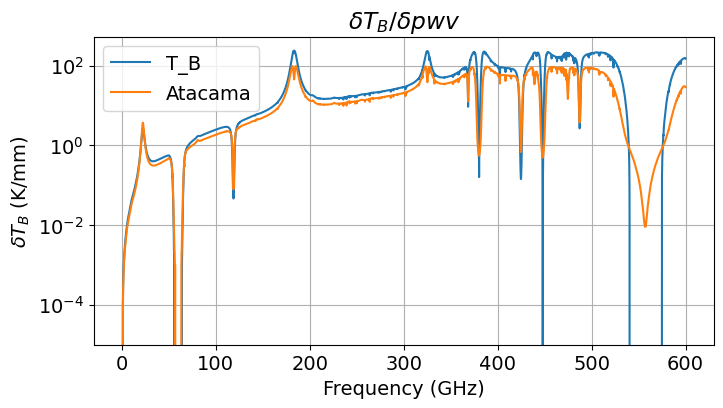

In [5]:
#original way of plotting without jacobian
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [8, 4]

# plot Tb differences between pwvs, which are 0.1mm pwv apart.
dpwv = 0.1 #mm
nuvec = atmos['Pole'][400][0]
Tbdiff_pole = (atmos['Pole'][400][3]-atmos['Pole'][300][3])/dpwv  #K/mm
Tbdiff_atacama = (atmos['Atacama'][1000][3]-atmos['Atacama'][900][3])/dpwv  #K/mm

plt.semilogy(nuvec,Tbdiff_pole,label='T_B')
plt.semilogy(nuvec,Tbdiff_atacama,label='Atacama')
#plt.semilogy(nuvec, ((atmos['Pole'][400][5])-(atmos['Pole'][300][5]))/dpwv, color='red', label='Trj')
plt.ylabel('$\delta T_B$ (K/mm)')
plt.xlabel('Frequency (GHz)')
plt.legend()
#plt.xlim(0,350)
#plt.ylim(0.1,300)
plt.grid()
plt.title('$\delta T_B/ \delta pwv$')


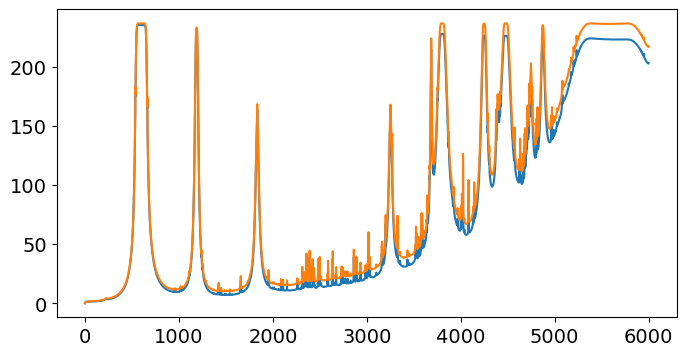

In [6]:
plt.plot(atmos['Pole'][400][3])
plt.plot(atmos['Pole'][400][5])
#plt.plot((atmos['Pole'][400][2]-atmos['Pole'][300][2])/dpwv)

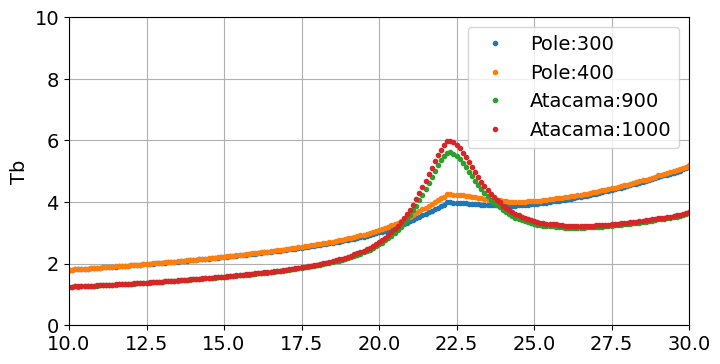

In [7]:
# Look at 22GHz water line more closely.
# Shape of Pole line is weird, maybe suspicious.  Should verify with direct am runs with
# better frequency resolution.

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [8, 4]

numax = 30

for site in ['Pole','Atacama']:
    for pwv in atmos[site].keys():
        pltlabel=site+':'+str(pwv)
        plt.plot(atmos[site][pwv][0],atmos[site][pwv][5],'.',label=pltlabel)
plt.legend()
plt.ylabel('Tb')
#plt.xlim(10,numax)
plt.xlim(10,30)
plt.ylim(0,10)
plt.grid()


## Plot delta_Tb / delta_pwv (Jacobian Way)

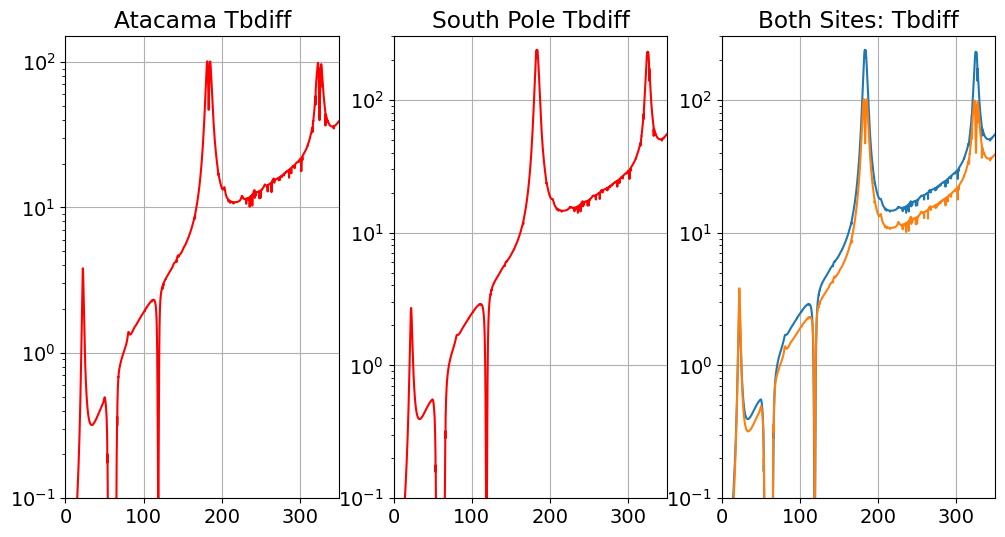

In [8]:
numax=350
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 6]
#Atacama
plt.subplot(1,3,1)
act=(atmos['Atacama'][900][4]/0.932)+(atmos['Atacama'][1000][4]/0.932) 
#Another way to do this would be to get the 950 pwv value and scale accordingly
act_freq=atmos['Atacama'][900][0]
plt.semilogy(act_freq, act/2, color='red')
plt.ylim(0.1,150)
plt.xlim(0,numax)
plt.title('Atacama Tbdiff')
plt.grid()

#South Pole
plt.subplot(1,3,2)
sp=(atmos['Pole'][300][4]/0.425)+(atmos['Pole'][400][4]/0.425)
pole_freq=atmos['Pole'][300][0]
plt.semilogy(pole_freq, sp/2, color='red')
plt.ylim(0.1,300)
plt.xlim(0,numax)
plt.title('South Pole Tbdiff')
plt.grid()

#Both
plt.subplot(1,3,3)
plt.semilogy(pole_freq, sp/2)#, color='red')
plt.semilogy(act_freq, act/2)#, color='red')
plt.ylim(0.1,300)
plt.xlim(0,numax)
plt.title('Both Sites: Tbdiff')
plt.grid()
#plt.suptitle('Original and New Tb_diff values')

# Calculate g_pwv = delta_Tb/delta_pwv for a specified instrument band.

1. Define a single-moded detector's instrument band response:
  - F_inst($\nu$) = F_detector($\nu$) \* F_optics($\nu$)
  
  - The frequency-dependent factors F_detector and F_optics are numpy arrays.  They can come from:
    - a file
    - a flat band definition
    - a logistic band defition 
    - a power law "$\nu^\alpha$" model.  We note that an overilluminated Lyot stop gives alpha=2.
  
  
2. Find dPoptical_atmosphere/dpwv by appropriately integrating B_atmos($\nu$, T_b_atmos)*F_inst($\nu$).


3. Find dPoptical_dT_cmb using
  - F_tot($\nu$) = F_inst($\nu$) * F_atmos($\nu$)
  - Appropriately ntegrate delta_T_cmb * F_tot($\nu$) 
  
   
4. Take the ratio of those two, g_pwv = (dPopt_atmosphere/dpwv)/(dPopt_cmb/dT_cmb) = dT_cmb/dpwv .
  - Note that any overall factor in instrument efficiency common to the two factors will cancel in this ratio.  Thus, we don't worry about the overall normalization of the detector or optics efficiency, or whether we're using a single polarization or unpolarized detector.

# Example calculation of g_pwv 
For several related band models near 90GHz:
- a flat detector band, 
- a similar logistic band,
- a flat detector band times an optics alpha model

Site =  Pole
Band:  nu_low = 130.0, nu_high = 170.0
Bandmodel        dPdpwv      dPdTcmb       gpwv
Flat             8.541e-12   6.083e-13     14.042
Logistic:        9.073e-12   6.068e-13     14.952
Logistic*alpha:  9.846e-12   6.032e-13     16.324


Text(0.5, 1.0, 'Band Models at 150 GHz')

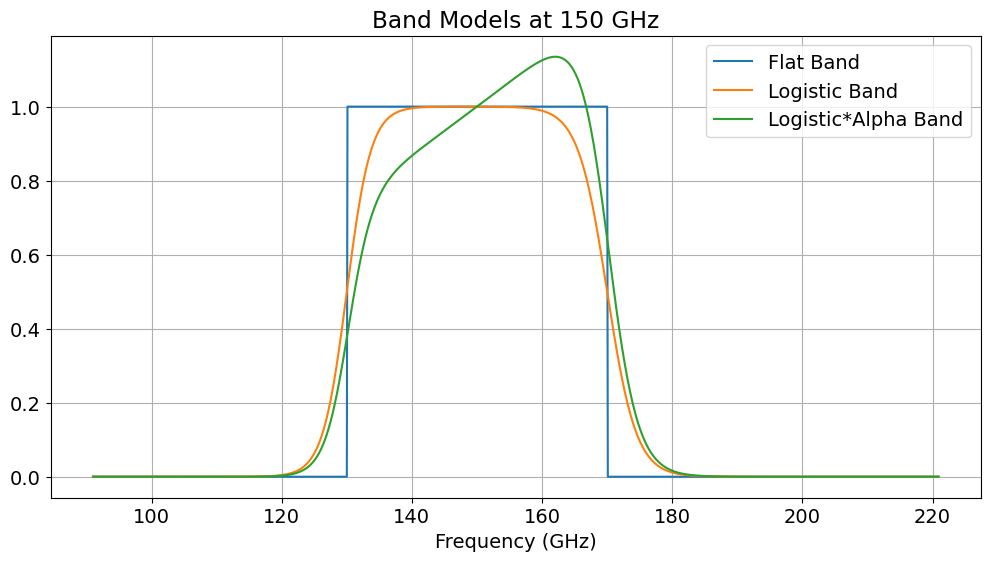

In [9]:
nu_lowedge = 130 # GHz
nu_highedge =170 
nu_center = (nu_lowedge+nu_highedge)/2
dnu = nu_highedge - nu_lowedge

# Integration frequency vector
nu_ghz = np.arange(nu_lowedge*0.7,nu_highedge*1.3,0.1) # full frequency vector over which to integrate.

# Choose site, and therefore the atmosphere
site = 'Pole'
pwv1 = list(atmos[site].keys())[0]  # assume we've got two pwv's loaded in!
pwv2 = list(atmos[site].keys())[1]
nu_atmos = atmos[site][pwv1][0]
Tb1 = atmos[site][pwv1][5] #**if you want to use the delta_tb/delta_pwv results you need to switch it ([4]) here and adjust below!
Tb2 = atmos[site][pwv2][5]
atmos_trans = (atmos[site][pwv2][2]+atmos[site][pwv1][2])/2
dpwv = 0.1 #mm
# Interpolate Tb's to nu_ghz frequency points
Tb1_i = np.interp(nu_ghz,nu_atmos,Tb1) 
Tb2_i = np.interp(nu_ghz,nu_atmos,Tb2)
atmos_trans_i = np.interp(nu_ghz,nu_atmos,atmos_trans)

print('Site = ',site)
print('Band:  nu_low = {0:4.1f}, nu_high = {1:4.1f}'.format(nu_lowedge, nu_highedge))
print('Bandmodel        dPdpwv      dPdTcmb       gpwv')

#flat band calculation
flat_band = flat_bandmodel(nu_ghz,nu_lowedge,nu_highedge)
dPdpwv = calc_dPdpwv(nu_ghz, Tb1_i, Tb2_i, dpwv, flat_band) #**here is where you will adjust to use delta_tb/delta_pwv from previous sections
dPdTcmb = calc_dPdTcmb(nu_ghz, flat_band, atmos_trans_i)
gpwv= calc_gpwv(dPdpwv, dPdTcmb)
print('Flat             {0:4.3e}   {1:4.3e}     {2:4.3f}'.format(dPdpwv, dPdTcmb, gpwv))

#logistic band calculation
logistic_band = logistic_bandmodel(nu_ghz, nu_center, dnu, 2.0, 0.7)
dPdpwv = calc_dPdpwv(nu_ghz, Tb1_i, Tb2_i, dpwv, logistic_band)
dPdTcmb = calc_dPdTcmb(nu_ghz, logistic_band, atmos_trans_i)
gpwv= calc_gpwv(dPdpwv, dPdTcmb)
print('Logistic:        {0:4.3e}   {1:4.3e}     {2:4.3f}'.format(dPdpwv, dPdTcmb, gpwv))


#flat*alpha band calculation
alpha = 2
alpha_band = alpha_bandmodel(nu_ghz,nu_center,alpha)
total_band = alpha_band*logistic_band
dPdpwv = calc_dPdpwv(nu_ghz, Tb1_i, Tb2_i, dpwv, total_band)
dPdTcmb = calc_dPdTcmb(nu_ghz, total_band, atmos_trans_i)
gpwv= calc_gpwv(dPdpwv, dPdTcmb)
print('Logistic*alpha:  {0:4.3e}   {1:4.3e}     {2:4.3f}'.format(dPdpwv, dPdTcmb, gpwv))

# plot some things
plt.plot(nu_ghz,flat_band, label='Flat Band')
plt.plot(nu_ghz,logistic_band, label='Logistic Band')
plt.plot(nu_ghz,total_band, label='Logistic*Alpha Band')
#plt.plot(nu_ghz,3*Tb1_i/np.max(Tb1_i))
#plt.ylim(0,1.5)
plt.xlabel('Frequency (GHz)')
plt.grid()
plt.legend()
plt.title('Band Models at 150 GHz')


# Run a wide range of frequency centers and fractional bandwidths
This will give a global view of where bands should be placed, by this metric.

In [10]:
#make a function that does the work so we can later plot a bunch of frequency ranges in a single plot.
def make_one_plot(flow,fhigh,atmos):
    ncbins = 30 #20
    nwbins = 10
    
    # Choose site, and therefore the atmosphere
    site = 'Pole'
    pwv1 = list(atmos[site].keys())[0]  # assume we've got two pwv's loaded in!
    pwv2 = list(atmos[site].keys())[1]
    nu_atmos = atmos[site][pwv1][0]
    Tb1 = atmos[site][pwv1][5]
    Tb2 = atmos[site][pwv2][5]
    atmos_trans = (atmos[site][pwv2][2]+atmos[site][pwv1][2])/2
    dpwv = 0.1 #mm
    
    # choose x-axis, center frequencies to do this over
    band_center_vec = np.linspace(flow,fhigh,ncbins) #centerfreq log space
    frac_bandwidth_vec = np.linspace(0.01,0.5,nwbins) #0.1, 0.4, 
    
    # Set up 2D arrays for plotting
    outdata={
        'center': np.empty((ncbins,nwbins)),
        'fwidth'  :  np.empty((ncbins,nwbins)),
        'highedge':  np.empty((ncbins,nwbins)),
        'lowedge' :  np.empty((ncbins,nwbins)),
        'gpwv'    :  np.empty((ncbins,nwbins)),
        'dPdTcmb' :  np.empty((ncbins,nwbins)),
        'dPdpwv'  :  np.empty((ncbins,nwbins))
        }
    
    cc = 0 # center index
    for center in band_center_vec:
        ww = 0  # width index
        for fwidth in frac_bandwidth_vec:
            # Set up frequency vector and associated band definition quantities
            nu_lowedge =  center*(1 - fwidth/2)  # these are edges of band;  integration extends beyond them.
            nu_highedge = center*(1 + fwidth/2)
            nu_center = (nu_lowedge+nu_highedge)/2
            delta_nu = nu_highedge - nu_lowedge 
            nu_low = 0.7*nu_lowedge
            nu_high = 1.3*nu_highedge
            nu_ghz = np.linspace(nu_low,nu_high, 1000)  # full integration band, make it 1000pts.
    
            # Interpolate Tb's to nu_ghz frequency points
            Tb1_i = np.interp(nu_ghz,nu_atmos,Tb1)
            Tb2_i = np.interp(nu_ghz,nu_atmos,Tb2)
            atmos_trans_i = np.interp(nu_ghz,nu_atmos,atmos_trans)
            outdata['center'][cc][ww] = center
            outdata['fwidth'][cc][ww] = fwidth
            outdata['lowedge'][cc][ww] = nu_lowedge
            outdata['highedge'][cc][ww] = nu_highedge
            
            
            flat_band = flat_bandmodel(nu_ghz,nu_lowedge,nu_highedge)
            logistic_band = logistic_bandmodel(nu_ghz, nu_center, delta_nu, 2.0, 0.7)
            alpha_band = alpha_bandmodel(nu_ghz,nu_center,alpha)
            # Choose one of the above, here.
            total_band = flat_band #logistic_band#*#alpha_band
    
            dPdpwv = calc_dPdpwv(nu_ghz, Tb1_i, Tb2_i, dpwv, total_band)
            dPdTcmb = calc_dPdTcmb(nu_ghz, total_band, atmos_trans_i)
            gpwv= dPdpwv/dPdTcmb
            #gpwv= dPdpwv/dPdTcmb
            
            outdata['dPdpwv'][cc][ww]=dPdpwv
            outdata['dPdTcmb'][cc][ww]=dPdTcmb
            outdata['gpwv'][cc][ww] = calc_gpwv(dPdpwv, dPdTcmb)
            ww += 1
        cc += 1
    return outdata

def plot_one_panel(outdata,axs,rownum,minval,maxval,clevels):
    min_c = outdata['center'][0][0]
    max_c = outdata['center'][-1][-1]
    min_w = outdata['fwidth'][0][0]
    max_w = outdata['fwidth'][-1][-1]
    
    band_center_vec = outdata['center'][:,0]
    frac_bandwidth_vec = outdata['fwidth'][0,:]
    
    data = np.abs(outdata['gpwv'].T)
    print('data shape',data.shape)
    f_aspect = 2.0*(max_c-min_c)
    abc = axs[rownum].imshow(data,origin='lower',vmin=minval,aspect=f_aspect,vmax=maxval,interpolation='bilinear',extent=(min_c, max_c, min_w, max_w))

    cset = axs[rownum].contour(band_center_vec,frac_bandwidth_vec,data,levels=clevels,colors='w')
    axs[rownum].clabel(cset)
    
    #divider = make_axes_locatable(axs[rownum])
    #cax = divider.append_axes('top' , size='5%', pad='1%')
    #axs[rownum,colnum].scatter(sim['channels'][ch]['nu_center0'],sim['channels'][ch]['nu_width0'],s=200,marker='x',c='m')
    #fig.colorbar(abc, cax,orientation='horizontal')
    
    axs[rownum].set_xlabel('Center frequency (GHz)')
    #axs[rownum].set_ylabel('Fractional bandwidth')
    axs[rownum].grid()

data shape (10, 30)
data shape (10, 30)
data shape (10, 30)
data shape (10, 30)


Text(0.5, 0.68, 'South Pole $g_{pwv}$ (Flat Band Model)')

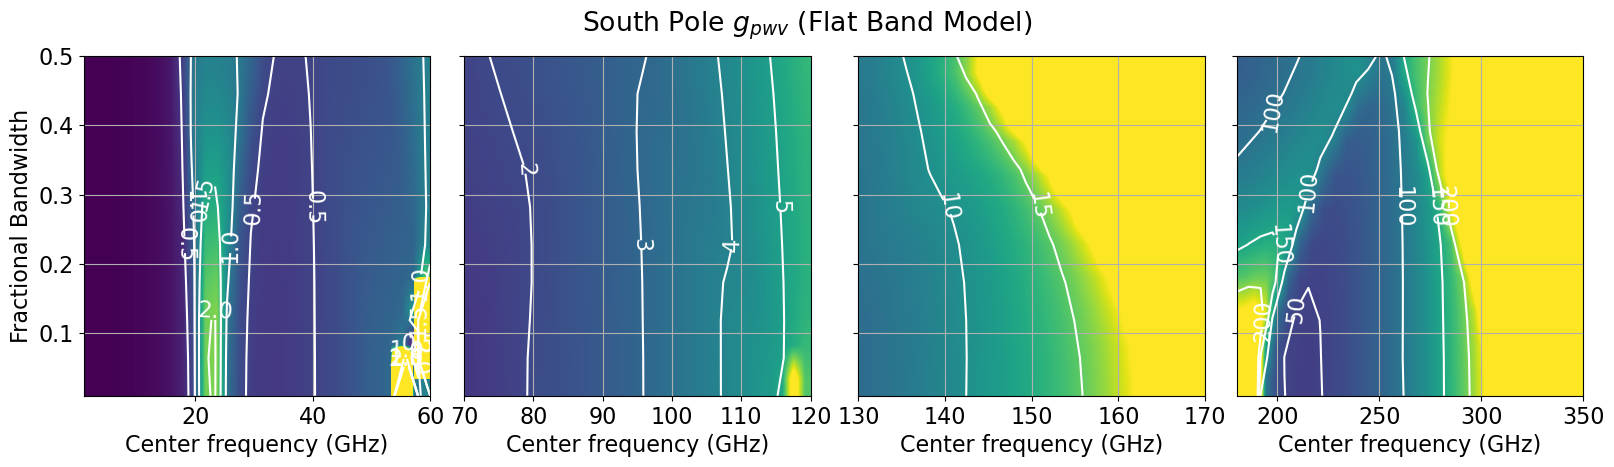

In [11]:
#make sure the bandmodel is defined in the function above
#Flat model
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [16, 12]

fig,axs = plt.subplots(nrows=1,ncols=4,sharey=True,constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=2 / 72, h_pad=2 / 72, hspace=0.1,wspace=0.0)

outdat = make_one_plot(1,60,atmos)
plot_one_panel(outdat,axs,0,0,2.5,[0,0.5,1,1.5,2])

outdat = make_one_plot(70,120,atmos)
plot_one_panel(outdat,axs,1,0,9,[0,1,2,3,4,5])

outdat = make_one_plot(130,170,atmos)
plot_one_panel(outdat,axs,2,0,20,[0,5,10,15])

outdat = make_one_plot(180,350,atmos)
plot_one_panel(outdat,axs,3,0,250,[0,50,100,150,200])
axs[0].set_ylabel('Fractional Bandwidth')
fig.suptitle('South Pole $g_{pwv}$ (Flat Band Model)', y=0.68)

data shape (10, 30)
data shape (10, 30)
data shape (10, 30)
data shape (10, 30)


Text(0.5, 0.68, 'South Pole $g_{pwv}$ (Logistic Band Model)')

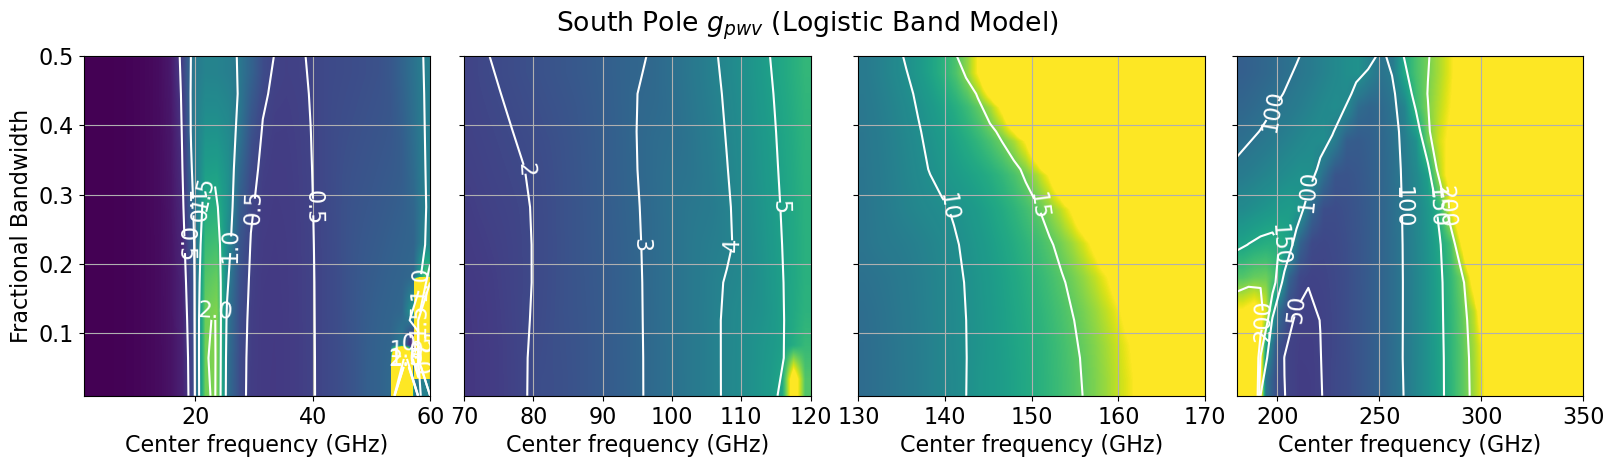

In [12]:
#rerun for Logisitic
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [16, 12]

fig,axs = plt.subplots(nrows=1,ncols=4,sharey=True,constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=2 / 72, h_pad=2 / 72, hspace=0.1,wspace=0.0)

outdat = make_one_plot(1,60,atmos)
plot_one_panel(outdat,axs,0,0,2.5,[0,0.5,1,1.5,2])

outdat = make_one_plot(70,120,atmos)
plot_one_panel(outdat,axs,1,0,9,[0,1,2,3,4,5])

outdat = make_one_plot(130,170,atmos)
plot_one_panel(outdat,axs,2,0,20,[0,5,10,15])

outdat = make_one_plot(180,350,atmos)
plot_one_panel(outdat,axs,3,0,250,[0,50,100,150,200])
axs[0].set_ylabel('Fractional Bandwidth')
fig.suptitle('South Pole $g_{pwv}$ (Logistic Band Model)', y=0.68)

data shape (10, 30)
data shape (10, 30)
data shape (10, 30)
data shape (10, 30)


Text(0.5, 0.68, 'South Pole $g_{pwv}$ (Logistic*Alpha Band Model)')

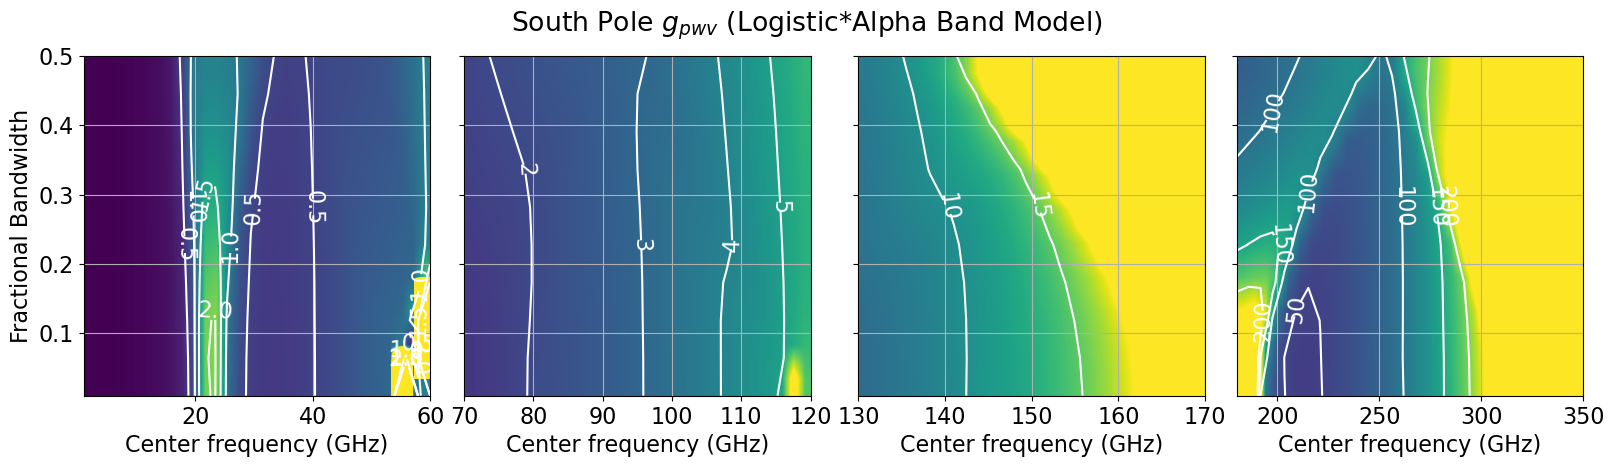

In [13]:
#rerun for Logisitic * alpha = 2
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [16, 12]

fig,axs = plt.subplots(nrows=1,ncols=4,sharey=True,constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=2 / 72, h_pad=2 / 72, hspace=0.1,wspace=0.0)

outdat = make_one_plot(1,60,atmos)
plot_one_panel(outdat,axs,0,0,2.5,[0,0.5,1,1.5,2])

outdat = make_one_plot(70,120,atmos)
plot_one_panel(outdat,axs,1,0,9,[0,1,2,3,4,5])

outdat = make_one_plot(130,170,atmos)
plot_one_panel(outdat,axs,2,0,20,[0,5,10,15])

outdat = make_one_plot(180,350,atmos)
plot_one_panel(outdat,axs,3,0,250,[0,50,100,150,200])
axs[0].set_ylabel('Fractional Bandwidth')
plt.suptitle('South Pole $g_{pwv}$ (Logistic*Alpha Band Model)', y=0.68)

In [14]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 4]

nrows = 4
flows = [1,60,]

fig.suptitle('g_pwv (K_cmb/mm)')

Text(0.5, 0.98, 'g_pwv (K_cmb/mm)')

It would be nice to make the plot above with log frequency on the x-axis, but that requires some fancy axis-labeling.


In [15]:
#plt.plot(band_center_vec,out_center.T[10,:],'.')
#plt.plot(band_center_vec,out_center.T[90,:],'.')
#plt.grid()

# Read in band information from a yaml file
(using same dictionary format as jbolo, for compatibility)

In [16]:
sim = yaml.safe_load(open('channels.yaml'))

In [17]:
sim['channels']

{'ULF': {'chnum': 0, 'band_center': 20.0, 'nu_low': 17.5, 'nu_high': 22.5},
 'LF_1': {'chnum': 1, 'band_center': 25.75, 'nu_low': 21.5, 'nu_high': 30.0},
 'LF_2': {'chnum': 2, 'band_center': 38.75, 'nu_low': 29.99, 'nu_high': 47.51},
 'MF_1': {'chnum': 3, 'band_center': 91.5, 'nu_low': 77.0, 'nu_high': 106.0},
 'MF_2': {'chnum': 4, 'band_center': 148.5, 'nu_low': 128.0, 'nu_high': 169.0},
 'HF_1': {'chnum': 5,
  'band_center': 227.0,
  'nu_low': 197.94,
  'nu_high': 256.06},
 'HF_2': {'chnum': 6,
  'band_center': 285.5,
  'nu_low': 255.95,
  'nu_high': 315.05}}

Text(0.5, 1.0, 'Model 1: Logistic LF1 Band')

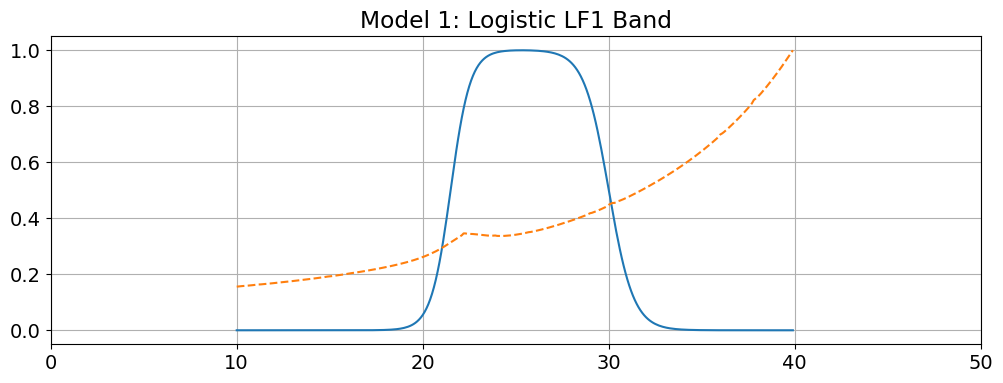

In [18]:
#test run to see band shape with logistic model
# Create our own frequency vector, over which we'll integrate.
# Make the logistic band model directly on that vector.
# Interpolate the atmospheric Tb's to that vector.

nuvec = np.arange(10,40,0.1) # frequency vector, interpolate atmos to this.
dnu= sim['channels']['LF_1']['nu_high']-sim['channels']['LF_1']['nu_low']
bandcenter = sim['channels']['LF_1']['band_center']
bandmodel = logistic_bandmodel(nuvec, bandcenter, dnu, 2.0, 0.7)
nu_atmos = atmos['Pole'][300][0]
Tb_atmos = atmos['Pole'][300][5]
Tb_interp = np.interp(nuvec,nu_atmos,Tb_atmos)

plt.plot(nuvec,bandmodel)
plt.plot(nuvec,Tb_interp/np.max(Tb_interp),'--')
plt.xlim(0,50)
plt.grid()
plt.title('Model 1: Logistic LF1 Band')

Comment on plot above:

- we might want to make band smaller for LF so we are not integrating over the whole thing (all freq)

# This is where we begin Testing and Incorporating our Python Functions
We first want to define what our model is similar to above, from there we can run the other functions to get specfic values, then we can put them all into a dictionary so we can call them later for plotting.

In [19]:
#This cell defines intial parameters for our instrument band model and atmospheric transmission
#we will be using the new am files for this section, but you can also use CH's data cube or other files

bandcenter = sim['channels']['LF_1']['band_center']
nulow=sim['channels']['LF_1']['nu_low']*0.7
nuhigh=sim['channels']['LF_1']['nu_high']*1.3
nuvec = np.arange(nulow, nuhigh, 0.1) # frequency vector, interpolate atmos to this.
dnu= sim['channels']['LF_1']['nu_high']-sim['channels']['LF_1']['nu_low']

nu_atmos = atmos['Pole'][300][0]
atmos_trans = atmos['Pole'][300][2]
atmos_trans_interp = np.interp(nuvec,nu_atmos,atmos_trans)
Tb_atmos1 = atmos['Pole'][300][5]
Tb_interp = np.interp(nuvec,nu_atmos,Tb_atmos1)
Tb_atmos2 = atmos['Pole'][400][5]
Tb_interp2= np.interp(nuvec,nu_atmos,Tb_atmos2)

dpwv = 0.1 # mm

a=2
n=0.7
alpha= 2 # 0 or 2

In [20]:
bandmodel = logistic_bandmodel(nuvec, bandcenter, dnu, a, n)*alpha_bandmodel(nuvec, bandcenter, alpha)#*atmos_trans

Text(0.5, 1.0, 'Band Model 2: Logistic+Optics for LF1')

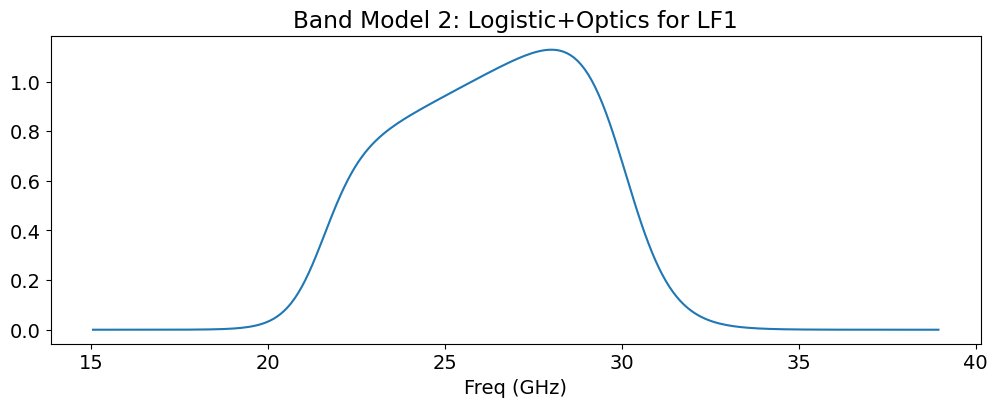

In [21]:
#this is the instrument and optics band model 
plt.plot(nuvec, bandmodel)
plt.xlabel('Freq (GHz)')
plt.title('Band Model 2: Logistic+Optics for LF1')#+ ch)

In [22]:
dpdtcmb= calc_dPdTcmb(nuvec, bandmodel, atmos_trans_interp)
print('dPdTcmb:', dpdtcmb)

dPdTcmb: 2.3002381961847274e-13


In [23]:
dPdpwv= calc_dPdpwv(nuvec, Tb_interp, Tb_interp2, dpwv, bandmodel)
print('dPdpwv:', dPdpwv)

dPdpwv: 2.345061112709386e-13


In [24]:
gpwv= calc_gpwv(dPdpwv, dpdtcmb)
print('gpwv:', gpwv)

gpwv: 1.0194862065150487


These are previous gpwv results for Pole at 300 and 400 um pwv:

1.122368744313282, 1.1707764662372104
<br>1.109273860925371, 1.157481276402308
<br>0.43580808244702285, 0.4563716164235642
<br>2.4419921980252965, 2.556993622960584
<br>12.825834088708984, 13.350005243407248
<br>54.11917318835391, 56.17281294172888
<br>166.1904136365731, 170.3894376628703

dPdTcmb:
<br>1.3661235964755087e-13 1.3661235964755087e-13
<br>2.306039014463887e-13 2.306039014463887e-13
<br>4.642291404321928e-13 4.642291404321928e-13
<br>6.445851145073793e-13 6.445851145073793e-13
<br>6.533097901070082e-13 6.533097901070082e-13
<br>4.839831617855115e-13 4.839831617855115e-13
<br>2.69708647175781e-13 2.69708647175781e-13

dPdpwv:
<br>1.5332944255529613e-13 1.5994253567248648e-13
<br>2.558028801018893e-13 2.66919698189518e-13
<br>2.0231481150778365e-13 2.1186100320996165e-13
<br>1.5740718205902628e-12 1.6482000272506868e-12
<br>8.379242976441777e-12 8.721689123497848e-12
<br>2.6192768552917207e-11 2.718669561392404e-11
<br>4.48229916355036e-11 4.595550472509482e-11

Given the results, the functions seem to be working well. Have @John check to make sure fxns are all correct.

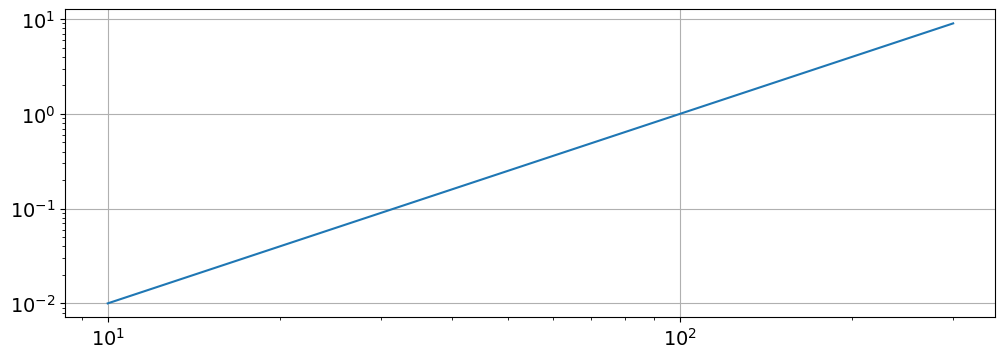

In [25]:
#this section visualizes the alpha bandmodel function, play with the alpha parameter (0 or 2)

nughz = np.linspace(10,300,100)
nu0 = 100 # GHz.3
#alpha = 2

band=alpha_bandmodel(nughz,nu0, 2)
plt.loglog(nughz,band)
plt.grid()

# Calculate and save gpwv values through all bands 
The following cells take portion of previous nbs and calculate gpwv values for each band and then save them into two dictionaries where they can be called to plot. We are able to look at high and low edge pwv values as well as center pwv values.

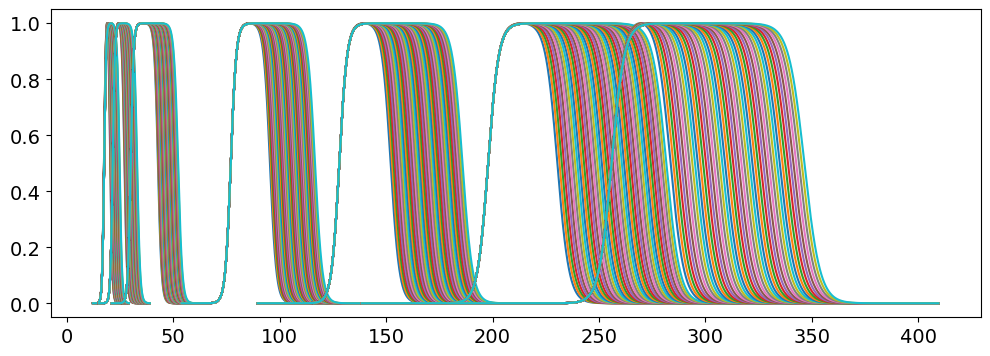

In [26]:
#South Pole Dict, run once
a = 2.0
n = 0.7
alpha= 2  #can be 0 or 2

chlist = list(sim['channels'].keys())
spole_dict={}
spole_pwvs=[300]#, 400]
#for site in ['Pole','Atacama']:
for pwv in spole_pwvs:
    spole_dict[pwv]={}
    for ch in chlist:
        spole_dict[pwv][ch]={}
        bandcenter = sim['channels'][ch]['band_center']
        nu_atmos = atmos['Pole'][pwv][0]
        nulow=sim['channels'][ch]['nu_low']
        nuhigh= sim['channels'][ch]['nu_high']
        dnu= nuhigh-nulow
        nuvec = np.arange(nulow*0.7,nuhigh*1.3,0.1)
        atmos_trans = atmos['Pole'][pwv][2]
        atmos_trans_interp = np.interp(nuvec,nu_atmos,atmos_trans)
        Tb_atmos1 = atmos['Pole'][pwv][5]
        Tb_interp = np.interp(nuvec,nu_atmos,Tb_atmos1)
        Tb_atmos2 = atmos['Pole'][pwv+100][5]
        Tb_interp2= np.interp(nuvec,nu_atmos,Tb_atmos2)
        bandmodel = logistic_bandmodel(nuvec, bandcenter, dnu, a, n)#*alpha_bandmodel(nuvec, bandcenter, alpha)
        dPdpwv = calc_dPdpwv(nuvec, Tb_interp, Tb_interp2, dpwv, bandmodel)
        dPdTcmb = calc_dPdTcmb(nuvec, bandmodel, atmos_trans_interp)
        gpwv= dPdpwv/dPdTcmb
        
        spole_dict[pwv][ch]['freqvec']= nuvec
        spole_dict[pwv][ch]['tbvec']= Tb_interp
        spole_dict[pwv][ch]['high_edge_0']= nuhigh
        spole_dict[pwv][ch]['low_edge_0']= nulow
        spole_dict[pwv][ch]['bandshape']= bandmodel#*atmos_trans_interp
        spole_dict[pwv][ch]['bandcenter']= bandcenter
        spole_dict[pwv][ch]['bandwidth']= nuhigh-nulow
        spole_dict[pwv][ch]['dPdTcmb']= dPdTcmb
        spole_dict[pwv][ch]['dPdpwv']= dPdpwv
        spole_dict[pwv][ch]['gpwv']= (dPdpwv/dPdTcmb)
        
        #look into .py file and edit
        npts=50
        freqvec_high= np.linspace(0.9*nuhigh, 1.1*nuhigh, npts)
        #freqvec_high= np.linspace(nuhigh-(nuhigh*0.1), nuhigh+(nuhigh*0.1), npts)
        dPdTcmb_h= np.array([])
        dPdpwv_h= np.array([])
        #gpwv_h= np.array([])
   
        nu= nuvec*1e9 
        dB_dT= dBdT(2.7, nu) ##take outside loop
        for freqhigh in freqvec_high: 
           
            model1 = logistic_easy(nuvec, nulow, freqhigh, a, n)#*alpha_bandmodel(nuvec, nulow, alpha)*atmos_trans_interp
            dPdTcmb= np.trapz(model1*dB_dT*(c**2/nu**2), nu)
            dPdTcmb_h= np.append(dPdTcmb_h, dPdTcmb)
            plt.plot(nuvec,model1)
            
            P_atm0 = np.trapz(model1*bnu_aomega(nu, Tb_interp), nu) 
            P_atm1 = np.trapz(model1*bnu_aomega(nu, Tb_interp2), nu) 
            dPdpwv = (P_atm1-P_atm0)/0.1
            dPdpwv_h= np.append(dPdpwv_h,dPdpwv)
            
            #gpwv_h= np.append(gpwv_h, dPdpwv/dPdTcmb)
        
        freqvec_low= np.linspace(0.9*nulow, 1.1*nulow, npts)
        #freqvec_low= np.linspace(nulow-(nulow*0.1), nulow+(nulow*0.1), npts)
        dPdTcmb_l= np.array([])
        dPdpwv_l= np.array([])
        #gpwv_l= np.array([])
   
        for freqlow in freqvec_low: 
            #nu= nuvec*1e9
            model1 = logistic_easy(nuvec, freqlow,nuhigh, a, n)#*alpha_bandmodel(nuvec, nuhigh, alpha)*atmos_trans_interp
            #dB_dT= dBdT(2.7, nu)
            dPdTcmb_l= np.append(dPdTcmb_l, np.trapz(model1*dB_dT*(c**2/nu**2), nu))
            P_atm0 = np.trapz(model1*bnu_aomega(nu, Tb_interp), nu) 
            P_atm1 = np.trapz(model1*bnu_aomega(nu, Tb_interp2), nu)                 
            dPdpwv_l= np.append(dPdpwv_l, (P_atm1-P_atm0)/0.1)
        #print(dPdpwv_l)
        #print(dPdTcmb_l)
    
        spole_dict[pwv][ch]['lowvec']= freqvec_low
        spole_dict[pwv][ch]['highvec']= freqvec_high
        
        spole_dict[pwv][ch]['dPdTcmb_l'] = dPdTcmb_l
        spole_dict[pwv][ch]['dPdTcmb_h'] = dPdTcmb_h
        
        spole_dict[pwv][ch]['dPdpwv_l'] = dPdpwv_l
        spole_dict[pwv][ch]['dPdpwv_h'] = dPdpwv_h
        
        spole_dict[pwv][ch]['gpwv_l'] = dPdpwv_l/dPdTcmb_l
        spole_dict[pwv][ch]['gpwv_h'] = dPdpwv_h/dPdTcmb_h
        

In [27]:
print(spole_dict[300]['HF_1']['gpwv_l'])
print(spole_dict[300]['HF_1']['gpwv_h'])

[104.90394096 103.36410662 101.37802915  98.94540271  96.09503088
  92.88717007  89.41089907  85.77631887  82.10289681  78.50642179
  75.08736746  71.92288003  69.06339932  66.53360173  64.33641357
  62.45851987  60.87600348  59.55922832  58.47657305  57.5969846
  56.8915242   56.33415421  55.90200906  55.57535061  55.33735287
  55.17381246  55.07284499  55.02460217  55.02102431  55.05562505
  55.1232917   55.22008052  55.34299438  55.4897473   55.65853708
  55.84785242  56.05633386  56.28269256  56.52567782  56.7840768
  57.05672991  57.34254834  57.6405252   57.94973704  58.2693359
  58.59853857  58.93661647  59.28288201  59.63668168  59.99739037]
[48.64323775 48.78547854 48.93839623 49.10232737 49.27778895 49.46534977
 49.66550161 49.87853545 50.1044418  50.34286229 50.59311602 50.85430515
 51.1254718  51.40575559 51.69450882 51.99135715 52.29621425 52.60925719
 52.93085655 53.26146071 53.60145415 53.95103054 54.31012376 54.67842043
 55.05544532 55.44068787 55.83372239 56.23428301 5

In [28]:
#Atacama Dict, run once
a = 2.0
n = 0.7
alpha= 2  #can be 0 or 2

chlist = list(sim['channels'].keys())
atacama_dict={}
atacama_pwvs=[900]#, 1000]
dpwv = 0.1 #mm
#for site in ['Pole','Atacama']:
for pwv in atacama_pwvs:
    atacama_dict[pwv]={}
    for ch in chlist:
        atacama_dict[pwv][ch]={}
        bandcenter = sim['channels'][ch]['band_center']
        nu_atmos = atmos['Atacama'][pwv][0]
        nulow=sim['channels'][ch]['nu_low']
        nuhigh= sim['channels'][ch]['nu_high']
        dnu= nuhigh-nulow
        nuvec = np.arange(nulow*0.7,nuhigh*1.3,0.1)
        atmos_trans = atmos['Atacama'][pwv][2]
        atmos_trans_interp = np.interp(nuvec,nu_atmos,atmos_trans)
        Tb_atmos1 = atmos['Atacama'][pwv][5]
        Tb_interp = np.interp(nuvec,nu_atmos,Tb_atmos1)
        Tb_atmos2 = atmos['Atacama'][pwv+100][5]
        Tb_interp2= np.interp(nuvec,nu_atmos,Tb_atmos2)
        bandmodel = logistic_bandmodel(nuvec, bandcenter, dnu, a, n)*alpha_bandmodel(nuvec, bandcenter, alpha)
        dPdpwv = calc_dPdpwv(nuvec, Tb_interp, Tb_interp2, dpwv, bandmodel)
        dPdTcmb = calc_dPdTcmb(nuvec, bandmodel, atmos_trans_interp)
        gpwv= dPdpwv/dPdTcmb
        
        atacama_dict[pwv][ch]['freqvec']= nuvec
        atacama_dict[pwv][ch]['tbvec']= Tb_interp
        atacama_dict[pwv][ch]['high_edge_0']= nuhigh
        atacama_dict[pwv][ch]['low_edge_0']= nulow
        atacama_dict[pwv][ch]['bandshape']= bandmodel#*atmos_trans_interp
        atacama_dict[pwv][ch]['bandcenter']= bandcenter
        atacama_dict[pwv][ch]['bandwidth']= nuhigh-nulow
        atacama_dict[pwv][ch]['dPdTcmb']= dPdTcmb
        atacama_dict[pwv][ch]['dPdpwv']= dPdpwv
        atacama_dict[pwv][ch]['gpwv']= (dPdpwv/dPdTcmb)
        
        npts=50
        freqvec_high= np.linspace(0.9*nuhigh, 1.1*nuhigh, npts)
        dPdTcmb_h= np.array([])
        dPdpwv_h= np.array([])
        gpwv_h= np.array([])
   
        nu= nuvec*1e9
        dB_dT= dBdT(2.7, nu)
        for freqhigh in freqvec_high: 
            model1 = logistic_easy(nuvec, nulow, freqhigh, a, n)#*alpha_bandmodel(nuvec, bandcenter, alpha)*atmos_trans_interp
            #print(model1)
            dPdTcmb_h= np.append(dPdTcmb_h, np.trapz(model1*dB_dT*(c**2/nu**2), nu))
            
            P_atm0 = np.trapz(model1*bnu_aomega(nu, Tb_interp), nu) 
            P_atm1 = np.trapz(model1*bnu_aomega(nu, Tb_interp2), nu)                 
            dPdpwv_h= np.append(dPdpwv_h, (P_atm1-P_atm0)/0.1)
            #gpwv_h= np.append(gpwv_h, dPdpwv_h/dPdTcmb_h)
                  
        freqvec_low= np.linspace(0.9*nulow, 1.1*nulow, npts)
        dPdTcmb_l= np.array([])
        dPdpwv_l= np.array([])
        gpwv_l= np.array([])
   
        for freqlow in freqvec_low: 
            #nu= nuvec*1e9
            model1 = logistic_easy(nuvec, freqlow,nuhigh, a, n)#*alpha_bandmodel(nuvec, bandcenter, alpha)*atmos_trans_interp
            #dB_dT= dBdT(2.7, nu)

            dPdTcmb_l= np.append(dPdTcmb_l, np.trapz(model1*dB_dT*(c**2/nu**2), nu))
            P_atm0 = np.trapz(model1*bnu_aomega(nu, Tb_interp), nu) 
            P_atm1 = np.trapz(model1*bnu_aomega(nu, Tb_interp2), nu)                 
            dPdpwv_l= np.append(dPdpwv_l, (P_atm1-P_atm0)/0.1)
        
        #print(dPdpwv_l)
        #print(dPdTcmb_l)
    
        atacama_dict[pwv][ch]['lowvec']= freqvec_low
        atacama_dict[pwv][ch]['highvec']= freqvec_high
        
        atacama_dict[pwv][ch]['dPdTcmb_l'] = dPdTcmb_l
        atacama_dict[pwv][ch]['dPdTcmb_h'] = dPdTcmb_h
        
        atacama_dict[pwv][ch]['dPdpwv_l'] = dPdpwv_l
        atacama_dict[pwv][ch]['dPdpwv_h'] = dPdpwv_h
        
        atacama_dict[pwv][ch]['gpwv_l'] = dPdpwv_l/dPdTcmb_l
        atacama_dict[pwv][ch]['gpwv_h'] = dPdpwv_h/dPdTcmb_h

In [29]:
for ch in chlist:
    print('SP Low:', ch, spole_dict[300][ch]['gpwv_l'])
    #print('ACT low:', ch, atacama_dict[900][ch]['gpwv_l'])

SP Low: ULF [0.89361106 0.9015533  0.90963112 0.91784773 0.9262064  0.93471052
 0.94336354 0.95216901 0.9611306  0.97025202 0.97953713 0.98898984
 0.99861417 1.00841424 1.01839424 1.02855848 1.03891133 1.04945728
 1.06020087 1.07114674 1.08229961 1.09366426 1.10524555 1.11704837
 1.12907769 1.14133849 1.15383581 1.16657466 1.1795601  1.19279713
 1.20629075 1.22004587 1.23406734 1.24835989 1.26292811 1.27777641
 1.29290898 1.30832978 1.32404242 1.34005023 1.35635606 1.37296235
 1.38987095 1.40708316 1.42459954 1.44241993 1.46054329 1.4789676
 1.49768985 1.51670579]
SP Low: LF_1 [1.15911724 1.16297151 1.16659811 1.16997502 1.17307904 1.17588571
 1.17836946 1.18050363 1.18226059 1.18361187 1.18452834 1.18498045
 1.18493843 1.18437265 1.1832539  1.18155384 1.17924542 1.1763033
 1.17270443 1.16842851 1.16345857 1.1577815  1.15138857 1.14427591
 1.13644494 1.12790273 1.11866224 1.10874244 1.09816834 1.08697084
 1.07518643 1.06285676 1.05002808 1.03675054 1.02307741 1.00906427
 0.99476809 0.9

In [30]:
print(atacama_dict[900]['HF_1']['gpwv_l'])
print(atacama_dict[900]['HF_1']['gpwv_h'])

[61.67944859 60.97052809 60.0922129  59.0550802  57.87715779 56.58188463
 55.19591128 53.74771475 52.267263   50.7859988  49.33608298 47.94843668
 46.65007292 45.46171598 44.3965104  43.46004597 42.6514195  41.96483786
 41.39130508 40.92009547 40.53988173 40.23950827 40.00846601 39.8371475
 39.71695656 39.6403319  39.60072772 39.59257998 39.61127179 39.65309601
 39.71519949 39.79548955 39.892493   40.0051781  40.13276925 40.2745899
 40.42995778 40.59813724 40.77833677 40.9697329  41.17150261 41.38285196
 41.60303413 41.83135574 42.06717577 42.30990349 42.55899011 42.81391187
 43.07415814 43.33922509]
[34.75764915 34.87131593 34.99183775 35.11965932 35.25533655 35.39943788
 35.55244811 35.71466879 35.88612773 36.0665253  36.25524879 36.45147026
 36.65430668 36.86298852 37.07698194 37.29604173 37.52020424 37.74973846
 37.98506414 38.22664232 38.47485309 38.72988907 38.99169761 39.25999346
 39.53433871 39.81426407 40.09938705 40.38948697 40.68451805 40.98456897
 41.28979273 41.60033143 41

## Next Steps: Plotting and Data Visualization

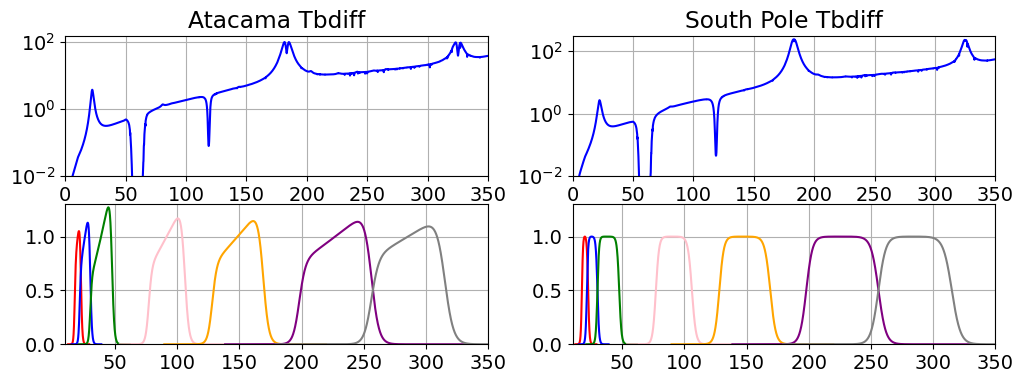

In [31]:
#cut off at 10^-2, two panel plot with top: bands bottom:below, put dot for each band
bandtype_dict= {'ULF':'red', 'LF_1': 'blue', 'LF_2': 'green', 'MF_1': 'pink', 'MF_2': 'orange', 'HF_1': 'purple', 'HF_2': 'grey'}
bandarray=list(bandtype_dict.keys())
#Atacama
plt.subplot(2,2,1)
x=(atmos['Atacama'][900][4]/0.932)+(atmos['Atacama'][1000][4]/0.932)
act_freq=atmos['Atacama'][900][0]
plt.semilogy(act_freq, x/2, color='blue')
plt.ylim(0.01,150)
plt.xlim(0,350)
plt.title('Atacama Tbdiff')
plt.grid()

#South Pole
plt.subplot(2,2,2)
x=(atmos['Pole'][300][4]/0.425)+(atmos['Pole'][400][4]/0.425)
pole_freq=atmos['Pole'][300][0]
plt.semilogy(pole_freq, x/2, color='blue')
plt.ylim(0.01,300)
plt.xlim(0,350)
plt.title('South Pole Tbdiff')
plt.grid()

plt.subplot(2,2,3)
for ch in chlist:   
    btype=bandtype_dict[ch]
    plt.plot(atacama_dict[900][ch]['freqvec'], atacama_dict[900][ch]['bandshape'], color=btype, label='Logistic Band Model')
plt.xlim(10, 350)
plt.ylim(0,1.3)
plt.grid()

plt.subplot(2,2,4)
for ch in chlist:   
    btype=bandtype_dict[ch]
    #plt.axvline(x = x1, color=btype, linestyle='dashed', markersize= 0.5)#, label = 'upper band edge')
    #plt.axvline(x = x2, color=btype, linestyle='dashed', markersize= 0.5)
    #plt.axvspan(x1, x2, alpha=0.2, color=btype) 
    plt.plot(spole_dict[300][ch]['freqvec'], spole_dict[300][ch]['bandshape'], color=btype, label='Logistic Band Model')
plt.xlim(10, 350)
plt.ylim(0,1.3)
plt.grid()

Text(0.5, 1.0, 'South Pole: Logistic Alpha Model for MF2 and HF1')

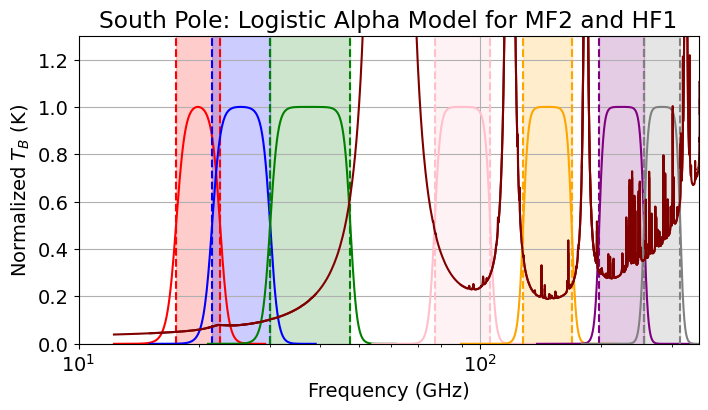

In [32]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [8, 4]

bandtype_dict= {'ULF':'red', 'LF_1': 'blue', 'LF_2': 'green', 'MF_1': 'pink', 'MF_2': 'orange', 'HF_1': 'purple', 'HF_2': 'grey'}
bandarray=list(bandtype_dict.keys())

#for band in bands['SAT'].keys():
    
for ch in chlist:   
    btype=bandtype_dict[ch]
    x1=spole_dict[300][ch]['high_edge_0']
    x2=spole_dict[300][ch]['low_edge_0']
    plt.axvline(x = x1, color=btype, linestyle='dashed', markersize= 0.5)#, label = 'upper band edge')
    plt.axvline(x = x2, color=btype, linestyle='dashed', markersize= 0.5)
        #plt.fill_between(x1, x2, color='blue', alpha=.2)
    plt.axvspan(x1, x2, alpha=0.2, color=btype) 
    
    plt.semilogx(spole_dict[300][ch]['freqvec'], spole_dict[300][ch]['bandshape'], color=btype, label='Logistic Band Model')
    plt.semilogx(spole_dict[300][ch]['freqvec'], spole_dict[300][ch]['tbvec']/50, color='maroon', linestyle='solid', markersize= 0.15)
#note that model 1 includes optics/lyot info and instrumentation info
plt.xlim(10, 350)
plt.ylim(0, 1.3)
plt.grid()
plt.xlabel('Frequency (GHz)')
plt.ylabel('Normalized $T_B$ (K)')
plt.title('South Pole: Logistic Alpha Model for MF2 and HF1')

Text(0.5, 1.0, 'Atacama: Logistic-Alpha Model for MF2 and HF1')

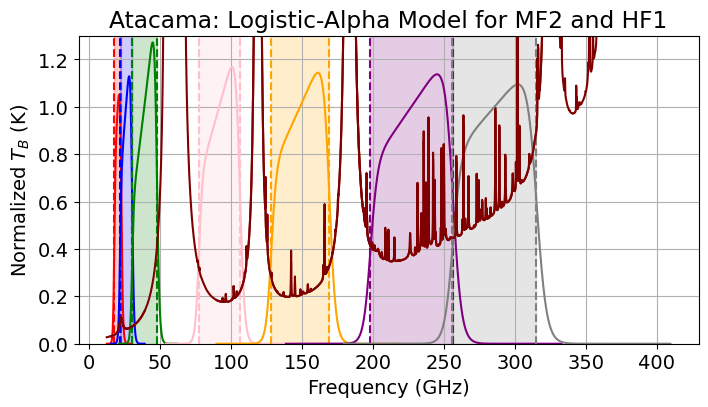

In [33]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [8, 4]
bandtype_dict= {'ULF':'red', 'LF_1': 'blue', 'LF_2': 'green', 'MF_1': 'pink', 'MF_2': 'orange', 'HF_1': 'purple', 'HF_2': 'grey'}
bandarray=list(bandtype_dict.keys())

#for band in bands['SAT'].keys():
    
for ch in chlist:   
    btype=bandtype_dict[ch]
    x1=atacama_dict[900][ch]['high_edge_0']
    x2=atacama_dict[900][ch]['low_edge_0']
    plt.axvline(x = x1, color=btype, linestyle='dashed', markersize= 0.5)#, label = 'upper band edge')
    plt.axvline(x = x2, color=btype, linestyle='dashed', markersize= 0.5)
        #plt.fill_between(x1, x2, color='blue', alpha=.2)
    plt.axvspan(x1, x2, alpha=0.2, color=btype) 
    
    plt.plot(atacama_dict[900][ch]['freqvec'], atacama_dict[900][ch]['bandshape'], color=btype, label='Logistic Band Model')
    plt.plot(atacama_dict[900][ch]['freqvec'], atacama_dict[900][ch]['tbvec']/50, color='maroon', linestyle='solid', markersize= 0.15)
#note that model 1 includes optics/lyot info and instrumentation info
#plt.xlim(120, 260)
plt.ylim(0, 1.3)
plt.grid()
plt.xlabel('Frequency (GHz)')
plt.ylabel('Normalized $T_B$ (K)')
plt.title('Atacama: Logistic-Alpha Model for MF2 and HF1')


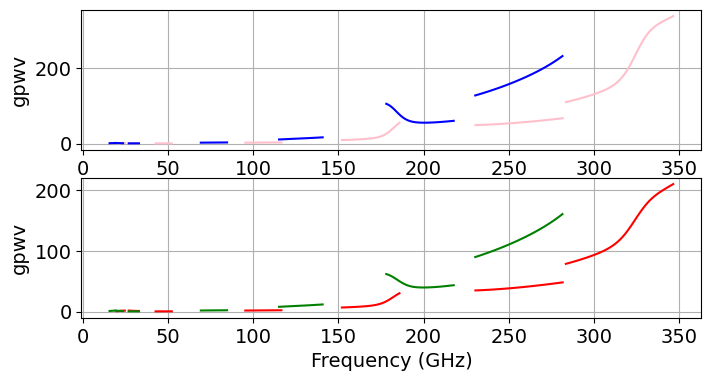

In [34]:
plt.subplot(2,1,1)
for ch in chlist:
    plt.plot(spole_dict[300][ch]['highvec'], spole_dict[300][ch]['gpwv_h'], color='pink')
    plt.plot(spole_dict[300][ch]['lowvec'], spole_dict[300][ch]['gpwv_l'], color='blue')
plt.ylabel('gpwv')
plt.grid()

plt.subplot(2,1,2)
for ch in chlist:
    plt.plot(atacama_dict[900][ch]['highvec'], atacama_dict[900][ch]['gpwv_h'], color='red')
    plt.plot(atacama_dict[900][ch]['lowvec'], atacama_dict[900][ch]['gpwv_l'], color='green')
plt.ylabel('gpwv')
plt.xlabel('Frequency (GHz)')
plt.grid()
    
#plt.legend()

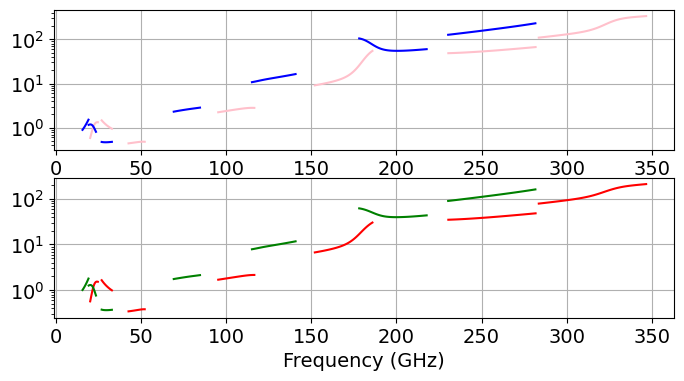

In [35]:
#comparison of the two sites and their respective gpwv high and low values
plt.subplot(2,1,1)
for ch in chlist:
    
    plt.semilogy(spole_dict[300][ch]['highvec'], spole_dict[300][ch]['gpwv_h'], color='pink')
    plt.semilogy(spole_dict[300][ch]['lowvec'], spole_dict[300][ch]['gpwv_l'], color='blue')
#plt.ylabel('gpwv_l')
plt.grid()

plt.subplot(2,1,2)
for ch in chlist:
    plt.semilogy(atacama_dict[900][ch]['highvec'], atacama_dict[900][ch]['gpwv_h'], color='red')
    plt.semilogy(atacama_dict[900][ch]['lowvec'], atacama_dict[900][ch]['gpwv_l'], color='green')
#plt.ylabel('gpwv_h')
plt.xlabel('Frequency (GHz)')
plt.grid()
    
#plt.legend()

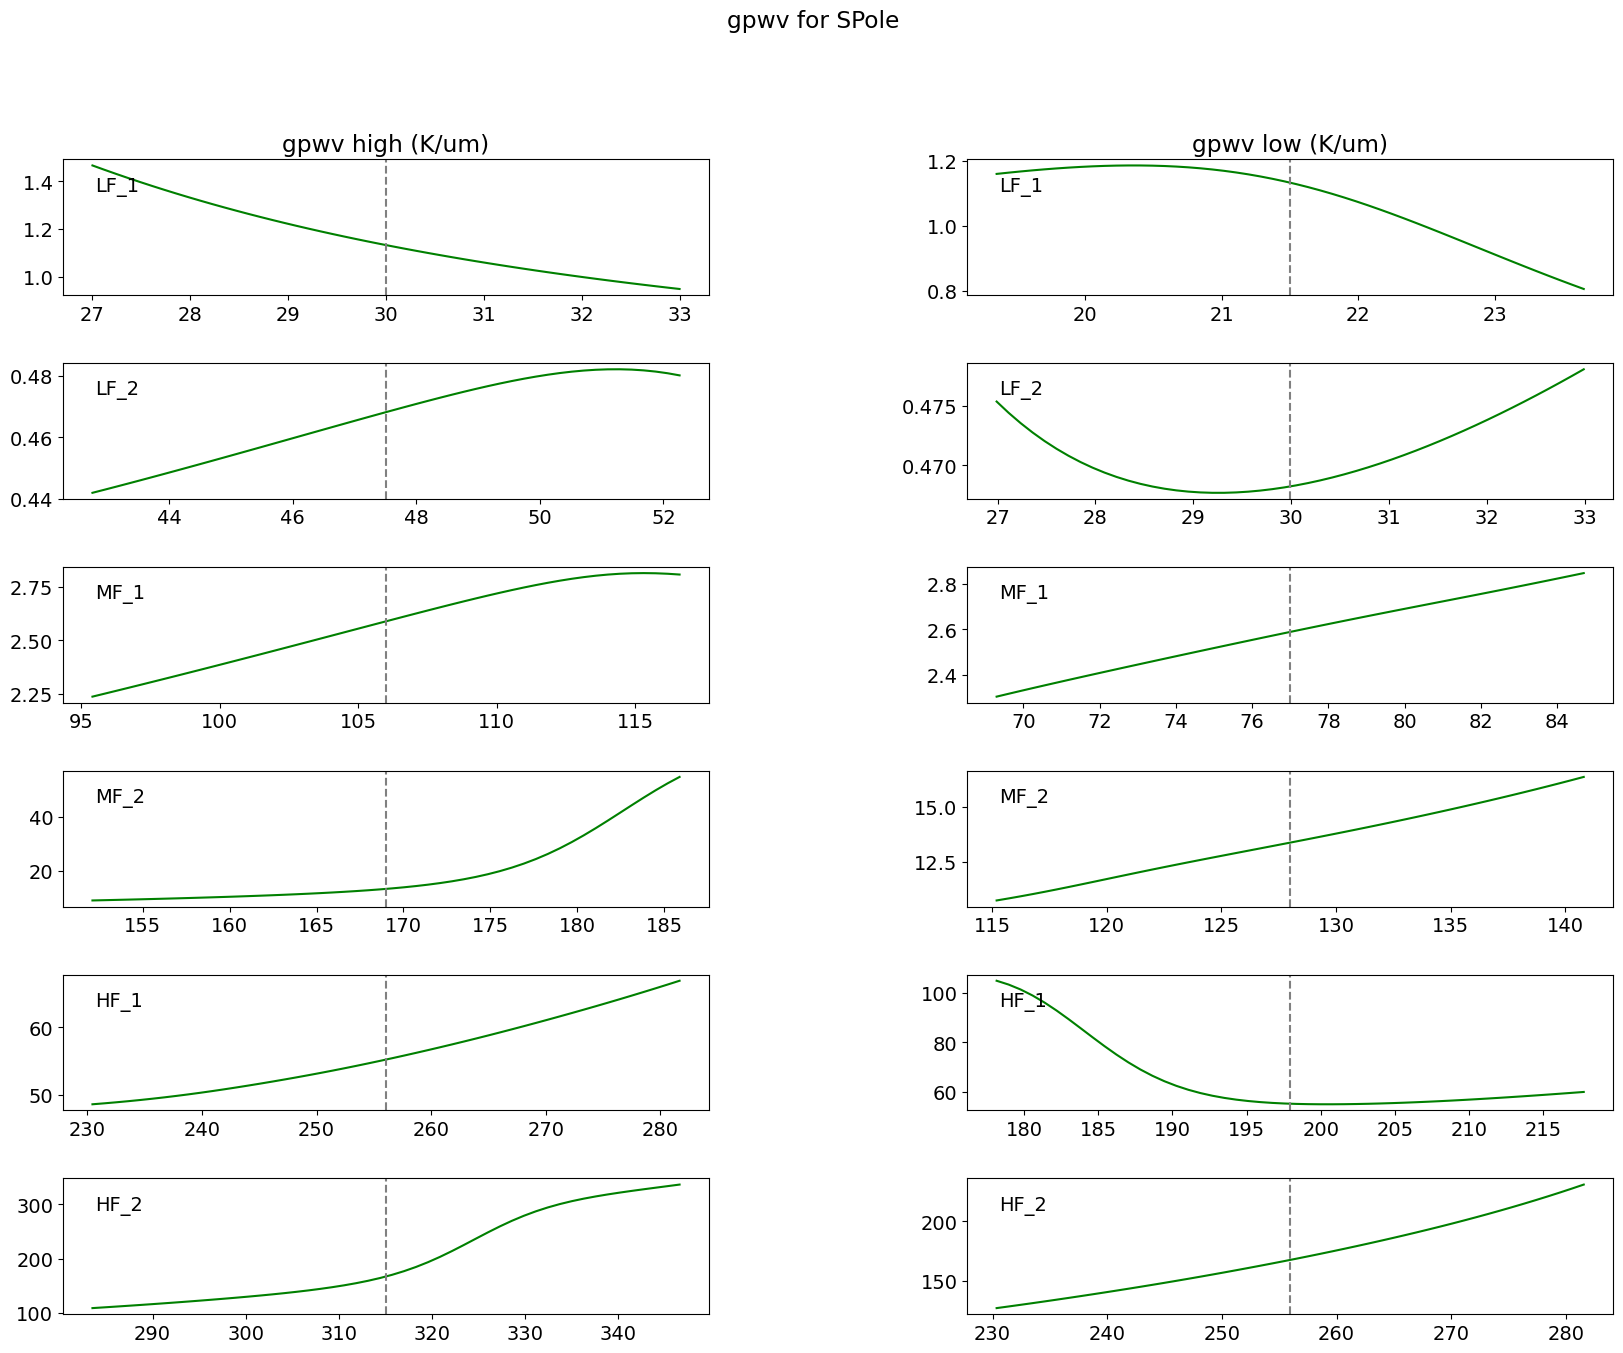

In [36]:
#SPole plots
ii1_dict= {'LF_1':0, 'LF_2':0, 'MF_1':0, 'MF_2':0, 'HF_1':0, 'HF_2':0} #'LF1':0, 'LF2':0, }
ii3_dict= {'LF_1':1, 'LF_2':1, 'MF_1':1, 'MF_2':1, 'HF_1':1, 'HF_2':1}
ii2_dict=  {'LF_1':0, 'LF_2':1, 'MF_1':2, 'MF_2':3, 'HF_1':4, 'HF_2':5} #, 'w188':1, 'w203':2, 'w204': 3, 'w206':4}
bandarray=list(ii1_dict.keys())
pwvtype_dict= {300: 'g', 900: 'r', 2200: 'b'}
figure, axis = plt.subplots(6, 2, figsize=(20,15))

figure.subplots_adjust(hspace=0.5, wspace=0.4)
figure.suptitle('gpwv for SPole')#,fontsize=20)
figure.set_constrained_layout_pads(w_pad=2 / 72, h_pad=2 / 72, hspace=0.1,
                                wspace=0.1)
axis[0,0].set_title('gpwv high (K/um)')
axis[0,1].set_title('gpwv low (K/um)')

#figure.text(0.08, 0.3, 'dt_cmb/dpwv (low)', va='center', rotation='vertical')
#figure.text(0.08, 0.7, 'dt_cmb/dpwv (high)', va='center', rotation='vertical')

Pole_pwvs= [300]
Atacama_pwvs= [900]

for pwv in Pole_pwvs:
    for ch in chlist:
        if ch != 'ULF':
            pwvtype= pwvtype_dict[pwv]
            ii1= ii1_dict[ch]
            ii2= ii2_dict[ch] 
            ii3= ii3_dict[ch] 
            axis[ii2, ii1].plot(spole_dict[pwv][ch]['highvec'], spole_dict[pwv][ch]['gpwv_h'], pwvtype, markersize= 3)
            axis[ii2, ii1].text(0.05, 0.8, ch, horizontalalignment='left',verticalalignment='center', transform=axis[ii2,ii1].transAxes)
            axis[ii2, ii1].axvline(x = spole_dict[pwv][ch]['high_edge_0'], color='grey', linestyle='dashed', label = 'upper band edge')
            axis[ii2, ii3].plot(spole_dict[pwv][ch]['lowvec'], spole_dict[pwv][ch]['gpwv_l'], pwvtype, markersize= 3)
            axis[ii2, ii3].text(0.05, 0.8, ch, horizontalalignment='left',verticalalignment='center', transform=axis[ii2,ii3].transAxes)
            axis[ii2, ii3].axvline(x = spole_dict[pwv][ch]['low_edge_0'], color='grey', linestyle='dashed', label = 'upper band edge')
            #axis[ii3, ii2].set_xlabel('Frequency (GHz)', loc='center')

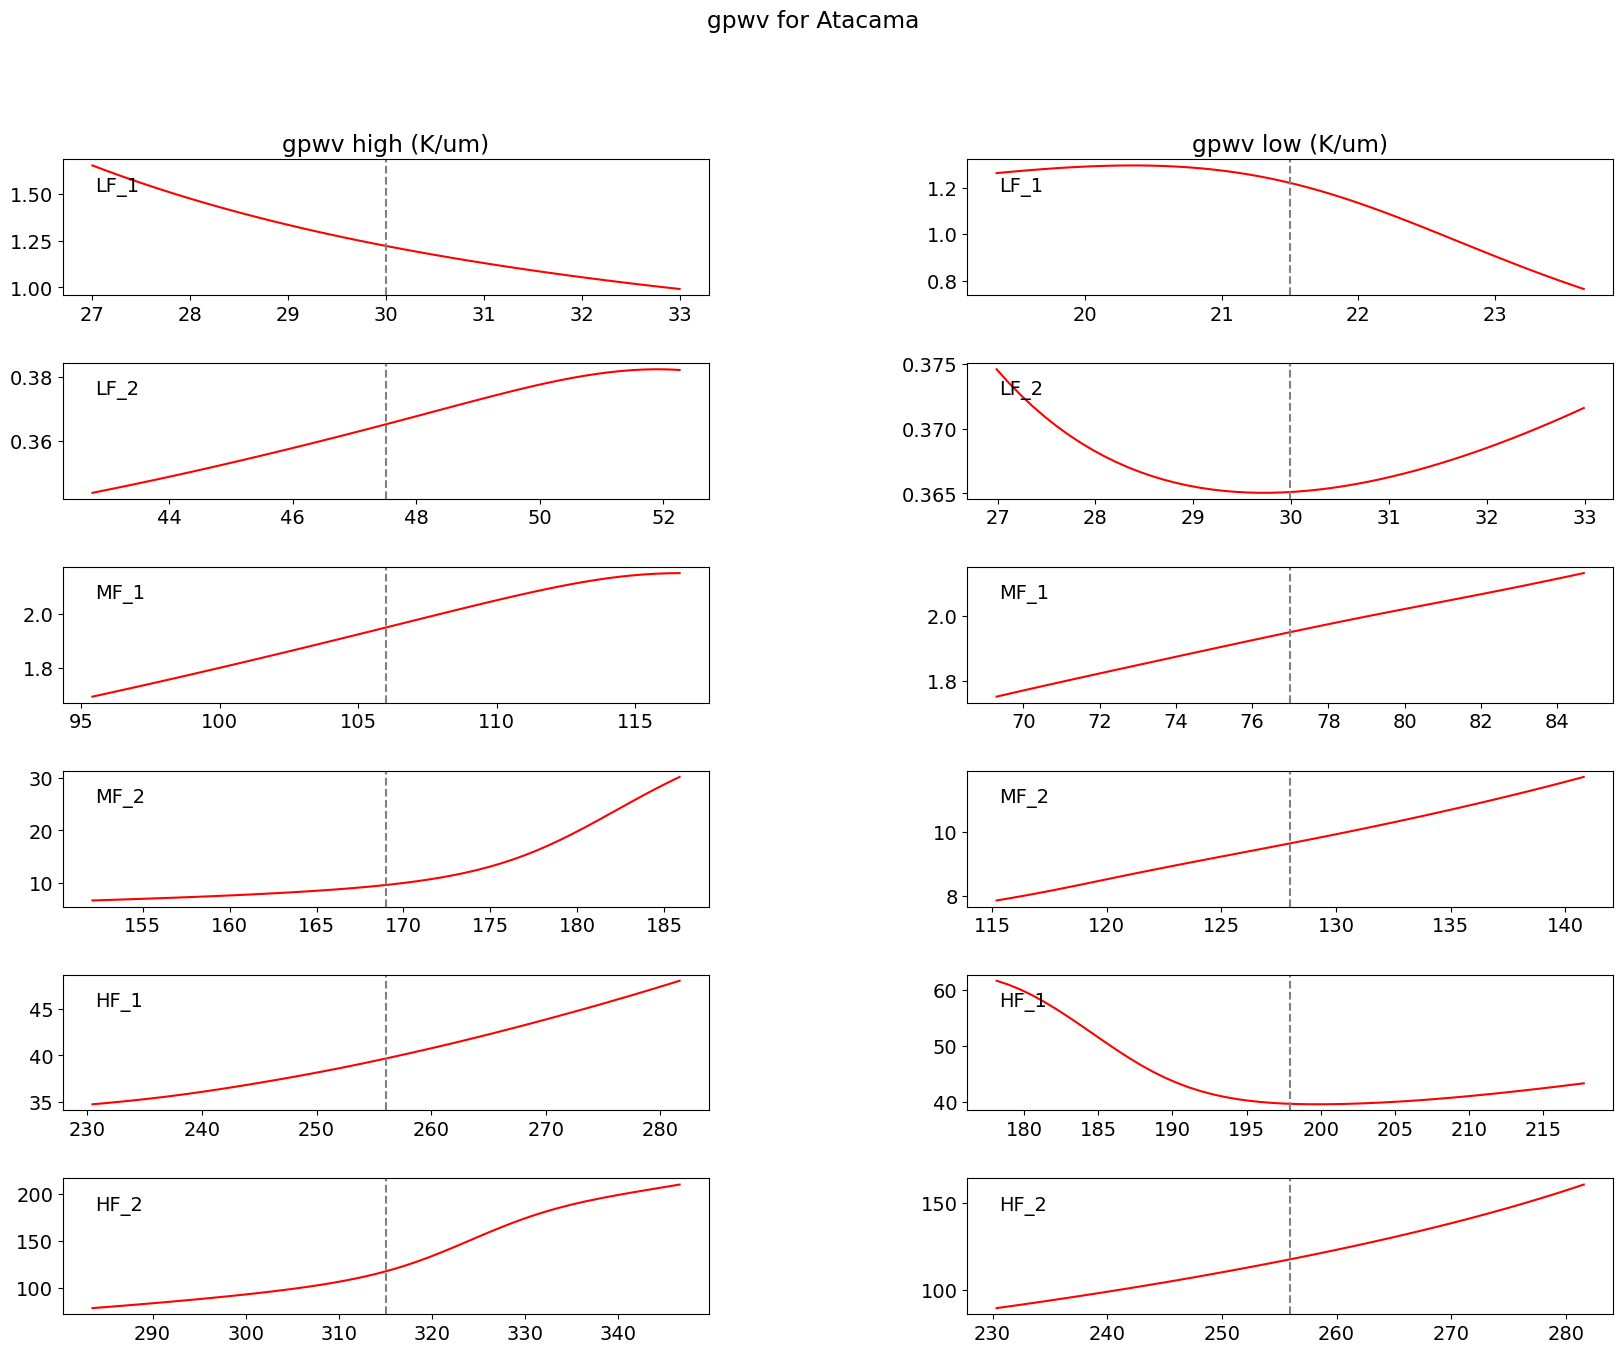

In [37]:
#Atacama plots 
ii1_dict= {'LF_1':0, 'LF_2':0, 'MF_1':0, 'MF_2':0, 'HF_1':0, 'HF_2':0} #'LF1':0, 'LF2':0, }
ii3_dict= {'LF_1':1, 'LF_2':1, 'MF_1':1, 'MF_2':1, 'HF_1':1, 'HF_2':1}
ii2_dict=  {'LF_1':0, 'LF_2':1, 'MF_1':2, 'MF_2':3, 'HF_1':4, 'HF_2':5} #, 'w188':1, 'w203':2, 'w204': 3, 'w206':4}
bandarray=list(ii1_dict.keys())
pwvtype_dict= {400: 'g', 900: 'r', 2200: 'b'}
figure, axis = plt.subplots(6, 2, figsize=(20,15))

figure.subplots_adjust(hspace=0.5, wspace=0.4)
figure.suptitle('gpwv for Atacama')#,fontsize=20)
#figure.text(0.5, 0.08, 'Frequency (GHz)', ha='center')
figure.set_constrained_layout_pads(w_pad=2 / 72, h_pad=2 / 72, hspace=0.1,
                                wspace=0.1)
axis[0,0].set_title('gpwv high (K/um)')
axis[0,1].set_title('gpwv low (K/um)')

#figure.text(0.08, 0.3, 'dt_cmb/dpwv (low)', va='center', rotation='vertical')
#figure.text(0.08, 0.7, 'dt_cmb/dpwv (high)', va='center', rotation='vertical')

Pole_pwvs= [400]
Atacama_pwvs= [900]

for pwv in Atacama_pwvs:
    for ch in chlist:
        if ch != 'ULF':
            pwvtype= pwvtype_dict[pwv]
            ii1= ii1_dict[ch]
            ii2= ii2_dict[ch] 
            ii3= ii3_dict[ch] 
            axis[ii2, ii1].plot(atacama_dict[pwv][ch]['highvec'], atacama_dict[pwv][ch]['gpwv_h'], pwvtype, markersize= 3)
            axis[ii2, ii1].text(0.05, 0.8, ch, horizontalalignment='left',verticalalignment='center', transform=axis[ii2,ii1].transAxes)

            axis[ii2, ii1].axvline(x = atacama_dict[pwv][ch]['high_edge_0'], color='grey', linestyle='dashed', label = 'upper band edge')
            axis[ii2, ii3].plot(atacama_dict[pwv][ch]['lowvec'], atacama_dict[pwv][ch]['gpwv_l'], pwvtype, markersize= 3)
            axis[ii2, ii3].text(0.05, 0.8, ch, horizontalalignment='left',verticalalignment='center', transform=axis[ii2,ii3].transAxes)
            axis[ii2, ii3].axvline(x = atacama_dict[pwv][ch]['low_edge_0'], color='grey', linestyle='dashed', label = 'upper band edge')
            #axis[ii2, ii3].set_xlabel('Frequency (GHz)', loc='center')

### Redoing the Above Plots Differently 

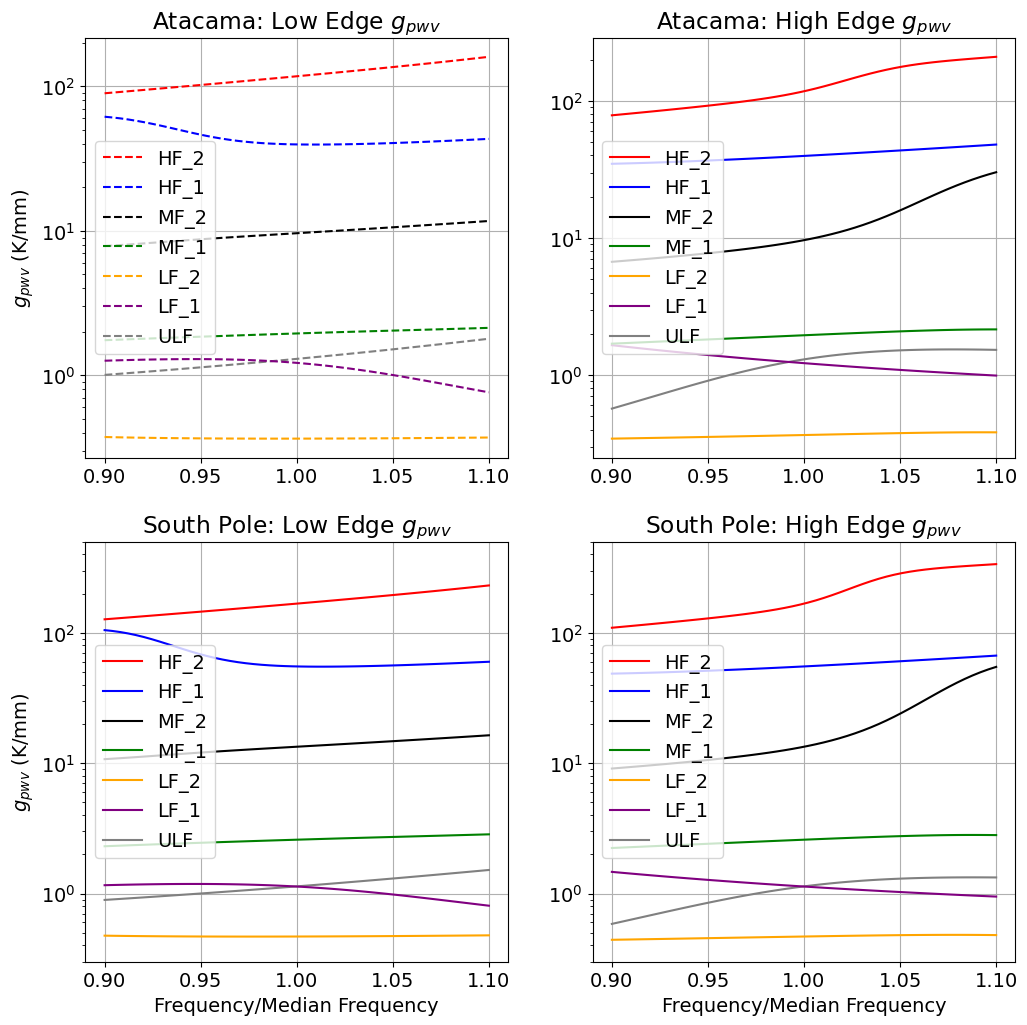

In [38]:
#comparison of the two sites and their respective gpwv high and low values
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 12]

bandtype_dict= {'LAT':{'HF_2':'red', 'HF_1': 'blue', 'MF_2': 'black', 
                       'MF_1': 'green', 'LF_2': 'orange', 'LF_1': 'purple', 'ULF': 'grey'}}
bandarray=list(bandtype_dict.keys())

plt.subplot(2,2,1)
for ch in chlist:
    btype=bandtype_dict['LAT'][ch]
    plt.semilogy(atacama_dict[900][ch]['lowvec']/atacama_dict[900][ch]['low_edge_0'], (atacama_dict[900][ch]['gpwv_l']), color=btype, linestyle='dashed', label=ch)
plt.ylabel('$g_{pwv}$ (K/mm)')
#plt.xlabel('Frequency/Median Frequency')
plt.title('Atacama: Low Edge $g_{pwv}$')
plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [6, 5, 4, 3, 2, 1, 0]

# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc='center left')#, loc='center')#, borderaxespad=0)

plt.subplot(2,2,2)
for ch in chlist:
    btype=bandtype_dict['LAT'][ch]
    plt.semilogy(atacama_dict[900][ch]['highvec']/atacama_dict[900][ch]['high_edge_0'], (atacama_dict[900][ch]['gpwv_h']), color=btype, label=ch)
#plt.ylabel('gpwv (K/mm)')
#plt.xlabel('Frequency/Median Frequency')
plt.title('Atacama: High Edge $g_{pwv}$')
plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [6, 5, 4, 3, 2, 1, 0]

# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order],loc='center left')#, loc='center')#, borderaxespad=0)
#plt.show()

plt.subplot(2,2,3)
for ch in chlist:
    btype=bandtype_dict['LAT'][ch]
    plt.semilogy((spole_dict[300][ch]['lowvec']/spole_dict[300][ch]['low_edge_0']),(spole_dict[300][ch]['gpwv_l']), color=btype, label=ch) #  np.median(spole_dict[300][ch]['lowvec']), (spole_dict[300][ch]['gpwv_l']), color=btype, linestyle='dashed', label=ch)
plt.ylabel('$g_{pwv}$ (K/mm)')
plt.xlabel('Frequency/Median Frequency')
plt.title('South Pole: Low Edge $g_{pwv}$')
plt.grid()
#plt.xlim(0.9,1.1)
plt.ylim(0.3,500)
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [6, 5, 4, 3, 2, 1, 0]

# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc='center left')#, loc='center')#, borderaxespad=0)
#plt.show()

plt.subplot(2,2,4)
for ch in chlist:
    btype=bandtype_dict['LAT'][ch]
    plt.semilogy((spole_dict[300][ch]['highvec']/spole_dict[300][ch]['high_edge_0']),(spole_dict[300][ch]['gpwv_h']), color=btype, label=ch)#np.median(spole_dict[300][ch]['highvec']), (spole_dict[300][ch]['gpwv_h']), color=btype, label=ch)
#plt.ylabel('gpwv (K/mm)')
plt.xlabel('Frequency/Median Frequency')
plt.title('South Pole: High Edge $g_{pwv}$')
plt.grid()
#plt.xlim(0.9,1.1)
plt.ylim(0.3,500)
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [6, 5, 4, 3, 2, 1, 0]

# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc='center left')#, borderaxespad=0)
plt.show()

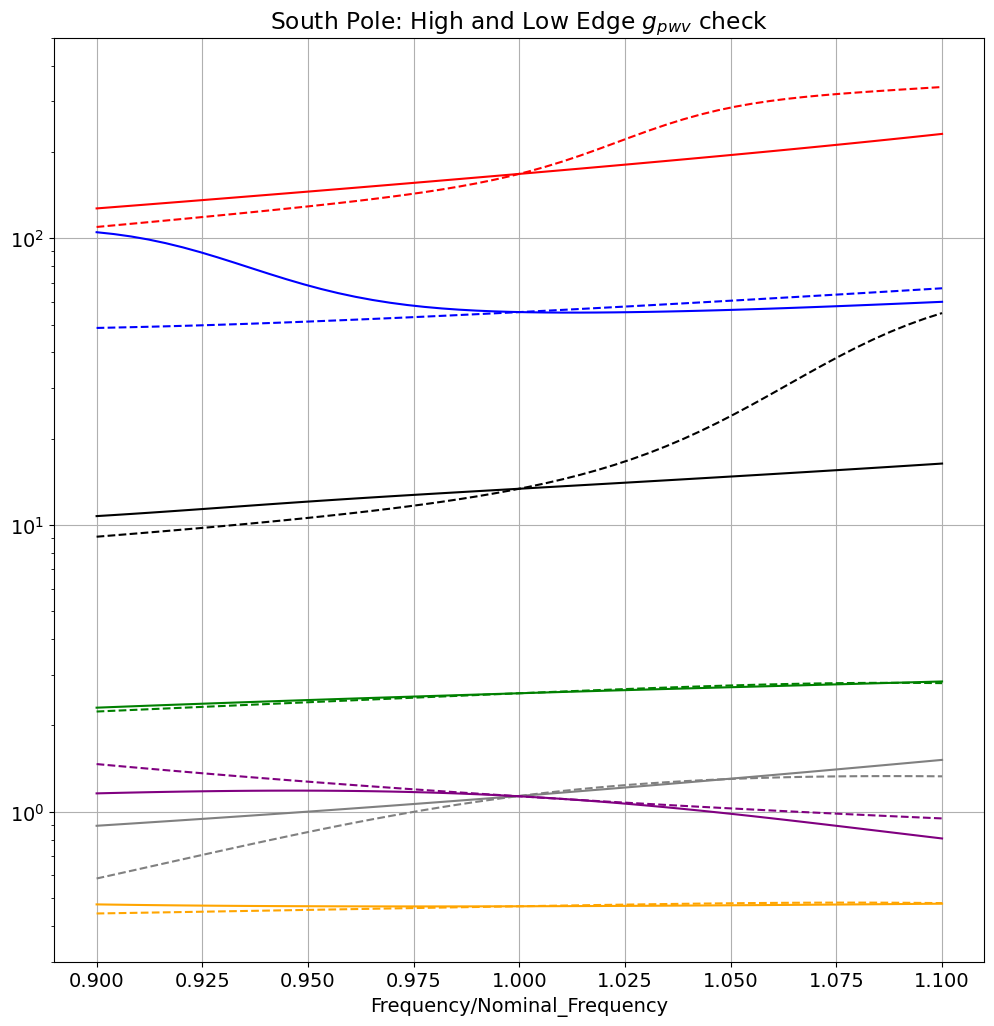

In [39]:
for ch in chlist:
    btype=bandtype_dict['LAT'][ch]
    plt.semilogy((spole_dict[300][ch]['lowvec']/spole_dict[300][ch]['low_edge_0']),(spole_dict[300][ch]['gpwv_l']), color=btype, label=ch) #  np.median(spole_dict[300][ch]['lowvec']), (spole_dict[300][ch]['gpwv_l']), color=btype, linestyle='dashed', label=ch)
    plt.semilogy((spole_dict[300][ch]['highvec']/spole_dict[300][ch]['high_edge_0']),(spole_dict[300][ch]['gpwv_h']), '--',color=btype, label=ch)#np.median(spole_dict[300][ch]['highvec']), (spole_dict[300][ch]['gpwv_h']), color=btype, label=ch)
#plt.ylabel('gpwv (K/mm)')
plt.xlabel('Frequency/Nominal_Frequency')
plt.title('South Pole: High and Low Edge $g_{pwv}$ check')
plt.grid()
#plt.xlim(0.9,1.1)
plt.ylim(0.3,500)
handles, labels = plt.gca().get_legend_handles_labels()

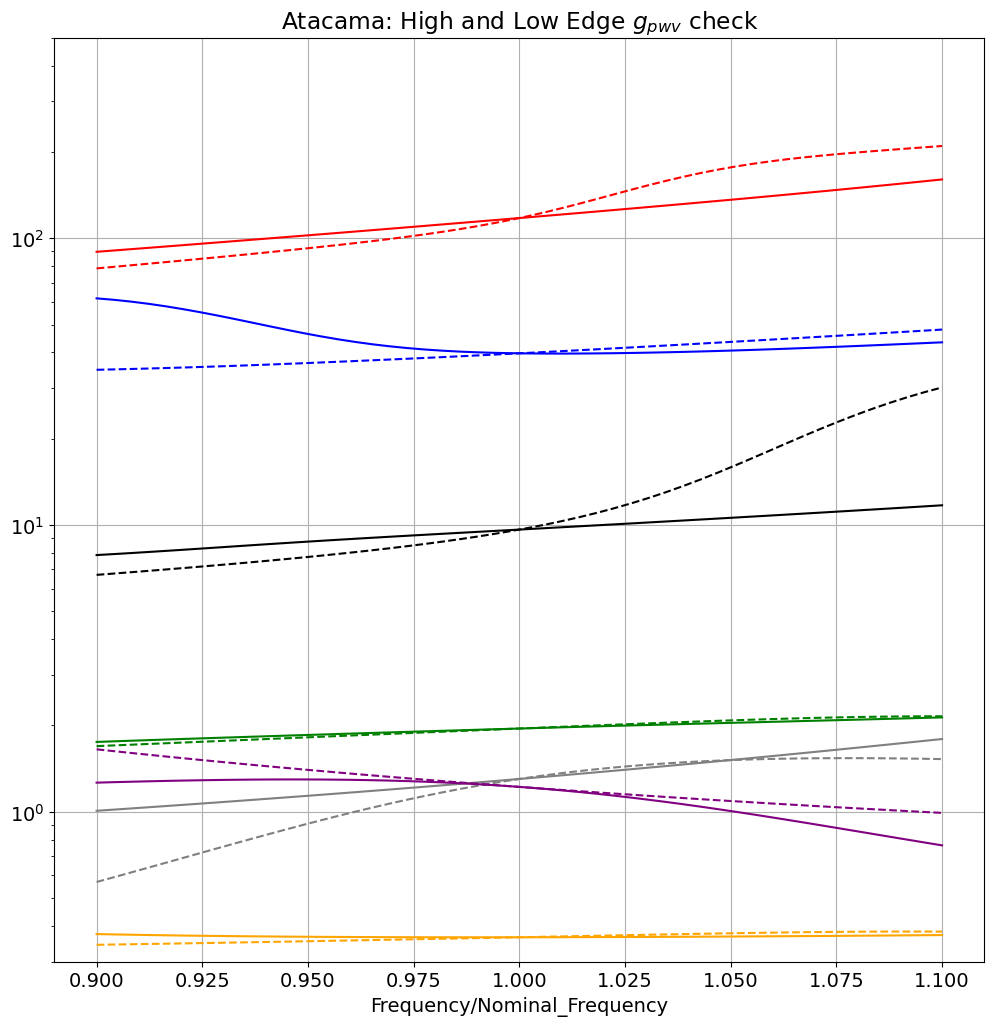

In [40]:
for ch in chlist:
    btype=bandtype_dict['LAT'][ch]
    plt.semilogy((atacama_dict[900][ch]['lowvec']/atacama_dict[900][ch]['low_edge_0']),(atacama_dict[900][ch]['gpwv_l']), color=btype, label=ch) #  np.median(spole_dict[300][ch]['lowvec']), (spole_dict[300][ch]['gpwv_l']), color=btype, linestyle='dashed', label=ch)
    plt.semilogy((atacama_dict[900][ch]['highvec']/atacama_dict[900][ch]['high_edge_0']),(atacama_dict[900][ch]['gpwv_h']), '--',color=btype, label=ch)#np.median(spole_dict[300][ch]['highvec']), (spole_dict[300][ch]['gpwv_h']), color=btype, label=ch)
#plt.ylabel('gpwv (K/mm)')
plt.xlabel('Frequency/Nominal_Frequency')
plt.title('Atacama: High and Low Edge $g_{pwv}$ check')
plt.grid()
#plt.xlim(0.9,1.1)
plt.ylim(0.3,500)
handles, labels = plt.gca().get_legend_handles_labels()

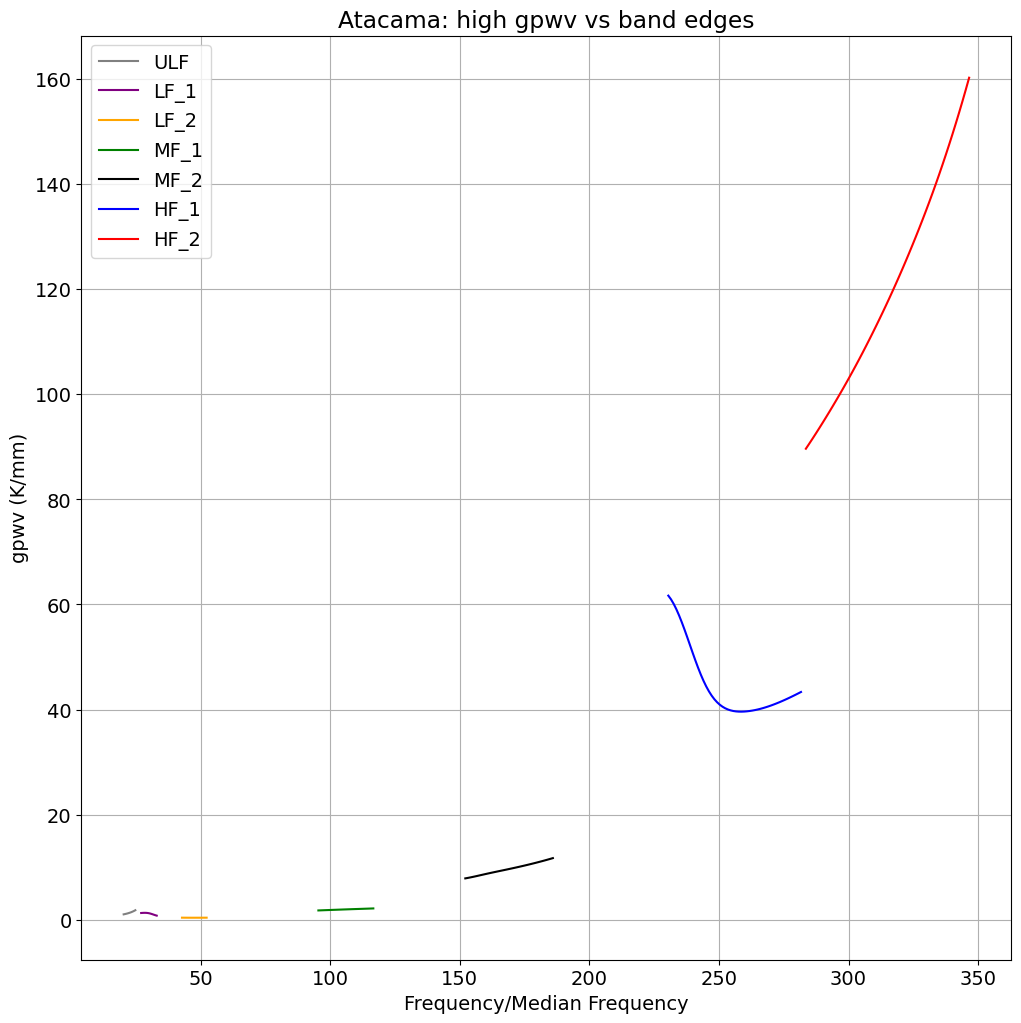

In [41]:
for ch in chlist:
    btype=bandtype_dict['LAT'][ch]
    plt.plot(atacama_dict[900][ch]['highvec'], (atacama_dict[900][ch]['gpwv_l']), color=btype, label=ch)
plt.ylabel('gpwv (K/mm)')
plt.xlabel('Frequency/Median Frequency')
plt.title('Atacama: high gpwv vs band edges')
plt.grid()
plt.legend()

In [42]:
#for ch in chlist:
    #print(atacama_dict[900][ch]['lowvec'])#/np.median(atacama_dict[900][ch]['lowvec']))
    #print((atacama_dict[900][ch]['gpwv_l'])/np.median(atacama_dict[900][ch]['gpwv_l'][25]))
    #plt.plot((atacama_dict[900][ch]['gpwv_l'])/np.median(atacama_dict[900][ch]['gpwv_l'][25]))

In [ ]:
#similar plot but with gpwv high and low values / gpwv center
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 12]

bandtype_dict= {'LAT':{'ULF':'red', 'LF_1': 'blue', 'LF_2': 'green', 
                       'MF_1': 'pink', 'MF_2': 'orange', 'HF_1': 'purple', 'HF_2': 'grey'}}
bandarray=list(bandtype_dict.keys())

#normal=(-np.min())/((np.max()-np.min())
                    
plt.subplot(2,2,1)
for ch in chlist:
    btype=bandtype_dict['LAT'][ch]
    #normal=0.5*(atacama_dict[900][ch]['lowvec']-np.min(atacama_dict[900][ch]['lowvec']))/((np.max(atacama_dict[900][ch]['lowvec'])-np.min(atacama_dict[900][ch]['lowvec'])))+0.75
    #normal2=0.5*((atacama_dict[900][ch]['gpwv_l']-np.min(atacama_dict[900][ch]['gpwv_l']))/((np.max(atacama_dict[900][ch]['gpwv_l']))-np.min(atacama_dict[900][ch]['gpwv_l'])))+0.75
    #plt.plot(normal, normal2, color=btype)#, linestyle='dashed' )
    plt.plot(atacama_dict[900][ch]['lowvec']/np.median(atacama_dict[900][ch]['lowvec']), (atacama_dict[900][ch]['gpwv_l']/atacama_dict[900][ch]['gpwv_l'][25]), color=btype, linestyle='dashed', label=ch)
    #plt.plot(atacama_dict[900][ch]['highvec']/np.median(atacama_dict[900][ch]['highvec']), (atacama_dict[900][ch]['gpwv_h']/np.median(atacama_dict[900][ch]['gpwv_h'])), color=btype, label=ch)
plt.ylabel('$g_{pwv}/g_{pwv0}$')
plt.ylim(0,3)
plt.title('Atacama: Low Edge $g_{pwv}/g_{pwv0}$')
plt.grid()
#plt.legend()
#changing the order of legend inputs
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [6, 5, 4, 3, 2, 1, 0]

# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order])#, loc='center')#, borderaxespad=0)
#plt.show()


plt.subplot(2,2,2)
for ch in chlist:
    btype=bandtype_dict['LAT'][ch]
    plt.plot(atacama_dict[900][ch]['highvec']/np.median(atacama_dict[900][ch]['highvec']), (atacama_dict[900][ch]['gpwv_h']/atacama_dict[900][ch]['gpwv_h'][25]), color=btype, label=ch)
#plt.ylabel('gpwv/gpwv_0')
plt.ylim(0,3)
plt.title('Atacama: High Edge $g_{pwv}/g_{pwv0}$')
plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [6, 5, 4, 3, 2, 1, 0]

# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order])#, loc='center')#, borderaxespad=0)
#plt.show()

plt.subplot(2,2,3)
for ch in chlist:
    btype=bandtype_dict['LAT'][ch]
    plt.plot(spole_dict[300][ch]['lowvec']/np.median(spole_dict[300][ch]['lowvec']), spole_dict[300][ch]['gpwv_l']/spole_dict[300][ch]['gpwv_l'][25],color=btype, linestyle='dashed', label=ch)
    #plt.plot(spole_dict[300][ch]['highvec']/np.median(spole_dict[300][ch]['highvec']), spole_dict[300][ch]['gpwv_h']/np.median(spole_dict[300][ch]['gpwv_h']), color=btype, label=ch)
    #plt.plot(spole_dict[300][ch]['lowvec']/np.median(spole_dict[300][ch]['lowvec']), (spole_dict[300][ch]['gpwv_l']/spole_dict[300][ch]['gpwv']), color=btype, linestyle='dashed')
    #plt.plot(spole_dict[300][ch]['highvec']/np.median(spole_dict[300][ch]['highvec']), (spole_dict[300][ch]['gpwv_h']/spole_dict[300][ch]['gpwv']), color=btype, label=ch)
plt.ylabel('$g_{pwv}/g_{pwv0}$')
plt.ylim(0,3)
plt.title('South Pole: Low Edge $g_{pwv}/g_{pwv0}$')
plt.xlabel('Frequency/Median Frequency')
plt.grid()

handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [6, 5, 4, 3, 2, 1, 0]

# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order])#, fontsize="12")#, loc='center')#, borderaxespad=0)
#plt.show()


plt.subplot(2,2,4)
for ch in chlist:
    btype=bandtype_dict['LAT'][ch]
    #plt.plot(spole_dict[300][ch]['lowvec']/np.median(spole_dict[300][ch]['lowvec']), spole_dict[300][ch]['gpwv_l']/np.median(spole_dict[300][ch]['gpwv_l']),color=btype, linestyle='dashed')
    plt.plot(spole_dict[300][ch]['highvec']/np.median(spole_dict[300][ch]['highvec']), spole_dict[300][ch]['gpwv_h']/spole_dict[300][ch]['gpwv_h'][25], color=btype, label=ch)#, linewidth=0.7)
#plt.ylabel('gpwv/gpwv_0')
plt.ylim(0,3)
plt.title('South Pole: High Edge $g_{pwv}/g_{pwv0}$')
plt.xlabel('Frequency/Median Frequency')
plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [6, 5, 4, 3, 2, 1, 0]

# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc='upper center')#, borderaxespad=0)
plt.show()



# Creating a Chart with gpwv values 

We want to make sure they are consistent with previous values
we want each band to have one pwv value and high and low values


In [ ]:
print('SPole (350 um) gpwv values')
print('band    gpwv  high_edge low_edge gpwv_h   gpwv_l')

#K/mm

Pole_pwvs= [300] #[200,400, 600]
#for Pole in sites:
for pwv in Pole_pwvs:
    for ch in chlist:
        gpwv = spole_dict[pwv][ch]['gpwv']
        f_high= spole_dict[pwv][ch]['highvec'] #
        y_high= spole_dict[pwv][ch]['gpwv_h'] #
        f0_high = spole_dict[pwv][ch]['high_edge_0']
        gpwv_h= spole_dict[pwv][ch]['gpwv_h'][25]
        #repeat for the lower edges
        f_low= spole_dict[pwv][ch]['lowvec'] #
        y_low= spole_dict[pwv][ch]['gpwv_l'] #
        f0_low = spole_dict[pwv][ch]['low_edge_0'] # nominal band edge
        gpwv_l= spole_dict[pwv][ch]['gpwv_l'][25]
        rowname1 = ch
        
        print(rowname1.ljust(5),end='')
        print('{0:7.2f}  {1:7.2f}  {2:7.2f}  {3:7.4f}  {4:7.2f} '.format(gpwv, f0_high, f0_low, gpwv_h, gpwv_l))

In [ ]:
for ch in chlist:
    print(atacama_dict[900][ch]['low_edge_0'])

In [ ]:
print('Atacama (950 um) gpwv values')
print('band    gpwv  high_edge low_edge gpwv_h   gpwv_l')

Atacama_pwvs= [900] #[200,400, 600]
#for Pole in sites:
for pwv in Atacama_pwvs:
    for ch in chlist:
        gpwv = atacama_dict[pwv][ch]['gpwv']
        f_high= atacama_dict[pwv][ch]['highvec'] #
        y_high= atacama_dict[pwv][ch]['gpwv_h'] #
        f0_high = atacama_dict[pwv][ch]['high_edge_0']
        gpwv_h= atacama_dict[pwv][ch]['gpwv_h'][26]
        #repeat for the lower edges
        f_low= atacama_dict[pwv][ch]['lowvec'] #
        y_low= atacama_dict[pwv][ch]['gpwv_l'] #
        f0_low = atacama_dict[pwv][ch]['low_edge_0'] # nominal band edge
        gpwv_l= atacama_dict[pwv][ch]['gpwv_l'][26]
        rowname1 = ch
        
        print(rowname1.ljust(5),end='')
        print('{0:7.2f}  {1:7.2f}  {2:7.2f}  {3:7.4f}  {4:7.2f} '.format(gpwv, f0_high, f0_low, gpwv_h, gpwv_l))

In [ ]:
print('SPole LAT New Band Edges @ +/-30% dTcmb/dpwv values')
print('band   pwv    nom_high  new_high  high_%  nom_low  new_low   low_%')
#figure.subplots_adjust(hspace=0.2, wspace=0.4)
#figure.suptitle('Pole')#,fontsize=20)

Pole_pwvs= [300] #[200,400, 600]
#for Pole in sites:
for pwv in Pole_pwvs:
    for ch in chlist:
        f_high= spole_dict[pwv][ch]['highvec'] #
        y_high= spole_dict[pwv][ch]['gpwv_h'] #
        f0_high = spole_dict[pwv][ch]['high_edge_0'] # nominal band edge
        #repeat for the lower edges
        f_low= spole_dict[pwv][ch]['lowvec'] #
        y_low= spole_dict[pwv][ch]['gpwv_l'] #
        f0_low = spole_dict[pwv][ch]['low_edge_0'] # nominal band edge
                #
        jj_high = np.argmin((f_high - f0_high)**2)
        jj_low = np.argmin((f_low - f0_low)**2)
        y0_high = y_high[jj_high]
        y0_low = y_low[jj_low]
                #
        yval_high = 1.3*y0_high # 30% higher than nominal
        yval_low = 0.7*y0_high  # 30% lower than nominal
        zz_high = (y_high-yval_high)**2
        zz_low = (y_low-yval_low)**2
        
        ii_high = np.argmin(zz_high)
        ii_low = np.argmin(zz_low)

        high_ghz_percent = f_high[ii_high]/f0_high 
        low_ghz_percent = f_low[ii_low]/f0_low
        rowname1 = ch
        print(rowname1.ljust(5),end='')
        print('{0:7.2f}  {1:7.2f}  {2:7.2f}  {3:7.4f}  {4:7.2f}  {5:7.2f}  {6:7.4f}'.format(pwv, f0_high, f_high[ii_high], high_ghz_percent, f0_low, f_low[ii_low], low_ghz_percent))

In [ ]:
# ADDITIONAL PAPER PLOTS

In [ ]:
# Atmos Plots for multiple sites

MK = np.loadtxt('MaunaKea_am.txt', unpack=True) #sf: 0.966
BOS = np.loadtxt('CambridgeMA_am.txt',unpack=True) # sf: 1.07

In [ ]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [10, 8]

plt.plot(MK[0], MK[4], color='green', label='Mauna Kea')
plt.plot(BOS[0], BOS[4], color='red', label='Boston')
plt.plot(atmos['Atacama'][900][0], atmos['Atacama'][900][5], color='blue', label='Atacama')
plt.plot(atmos['Pole'][300][0], atmos['Pole'][300][5], color='orange', label='South Pole')
plt.xlim(0,600)
plt.grid()
plt.legend(loc='center right')
plt.title('Planck Brightness Temperature at All Sites')
plt.ylabel('$T_B$ (K)')
plt.xlabel('Frequency (GHz)')

In [ ]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [10, 8]

plt.plot(MK[0], MK[2], color='green', label='Mauna Kea')
plt.plot(BOS[0], BOS[2], color='red', label='Boston')
plt.plot(atmos['Atacama'][900][0], atmos['Atacama'][900][2], color='blue', label='Atacama')
plt.plot(atmos['Pole'][300][0], atmos['Pole'][300][2], color='orange', label='South Pole')
plt.xlim(0,600)
plt.grid()
plt.legend(loc='center right')
plt.title('Transmission at All Sites')
plt.ylabel('Transmission ($T_x$)')
plt.xlabel('Frequency (GHz)')

In [ ]:
plt.rcParams['figure.figsize'] = [8, 4]
for ch in chlist:   
    btype=bandtype_dict[ch]
    x1=spole_dict[300][ch]['high_edge_0']
    x2=spole_dict[300][ch]['low_edge_0']
    plt.axvline(x = x1, color=btype, linestyle='dashed', markersize= 0.5)#, label = 'upper band edge')
    plt.axvline(x = x2, color=btype, linestyle='dashed', markersize= 0.5)
        #plt.fill_between(x1, x2, color='blue', alpha=.2)
    plt.axvspan(x1, x2, alpha=0.2, color=btype) 
    
#plt.semilogx(spole_dict[300][ch]['freqvec'], spole_dict[300][ch]['bandshape'], color=btype, label='Logistic Band Model')
plt.semilogy(atmos['Pole'][300][0], atmos['Pole'][300][4], label='South Pole', color='blue', linestyle='solid', markersize= 0.15)
plt.semilogy(atmos['Atacama'][900][0], atmos['Atacama'][900][4], color='maroon', label='Atacama')
#note that model 1 includes optics/lyot info and instrumentation info
plt.xlim(10,350)
plt.ylim(0.01, 130)
plt.legend(loc='lower right')
plt.ylabel('$\delta T_{RJ}/ \delta pwv$', fontsize=14)
plt.xlabel('Frequency (GHz)', fontsize=14)
plt.title('$\delta T_{RJ}/ \delta pwv$ for Each Site')

In [ ]:
for ch in chlist:
    plt.plot(atacama_dict[900][ch]['lowvec'],atacama_dict[900][ch]['dPdTcmb_l'])